In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display,HTML
display(HTML("<style>.container  {width:100% !important;}</style>"))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import finpy_tse as fpy
import matplotlib.pyplot as plt

In [4]:
plt.style.use('seaborn')
plt.rc('figure',autolayout=True,figsize=(18,8))
plt.rc('axes',labelweight='bold',labelsize='large',titleweight='bold',titlesize=20,titlepad=10)
plot_params = dict(color="0.75",style=".-",markeredgecolor="0.25",markerfacecolor="0.25")
%config InlineBackend.figure_format = 'retina'
plt.rc('ytick',labelsize=14)
plt.rc('xtick',labelsize=14)

In [5]:
import os
PROJECT_ROOT_DIR = "D:\Indexs"
CHAPTER_ID = "Prediction"
FILES_PATH = os.path.join(PROJECT_ROOT_DIR, "Excels_File_Periods", CHAPTER_ID)
os.makedirs(FILES_PATH, exist_ok=True)
def save_excel(data_frame, excel_filename):
    excel_path = os.path.join(FILES_PATH, excel_filename + ".xlsx")
    data_frame.to_excel(excel_path, index=True)
    print(f"Saving Excel file: {excel_path}")

In [6]:
import os
PROJECT_ROOT_DIR = "D:\Indexs"
CHAPTER_ID = "Prediction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Plot_Periods", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.feature_selection import chi2,f_regression,SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
start_date = '1401-10-24'
end_date = '1402-12-29'
ticker = 'خکاوه'

In [12]:
data=fpy.Get_USD_RIAL(
    start_date=start_date,end_date=end_date,ignore_date=False,show_weekday=False,double_date=False)

In [13]:
data.tail()

Open    High     Low   Close
J-Date                                    
1402-10-28  537070  540600  534000  536960
1402-10-30  535700  541550  534000  541170
1402-11-01  540020  542050  537200  538210
1402-11-02  538230  541540  535500  539540
1402-11-03  540810  548600  540020  548030

Saving figure Dollar Close


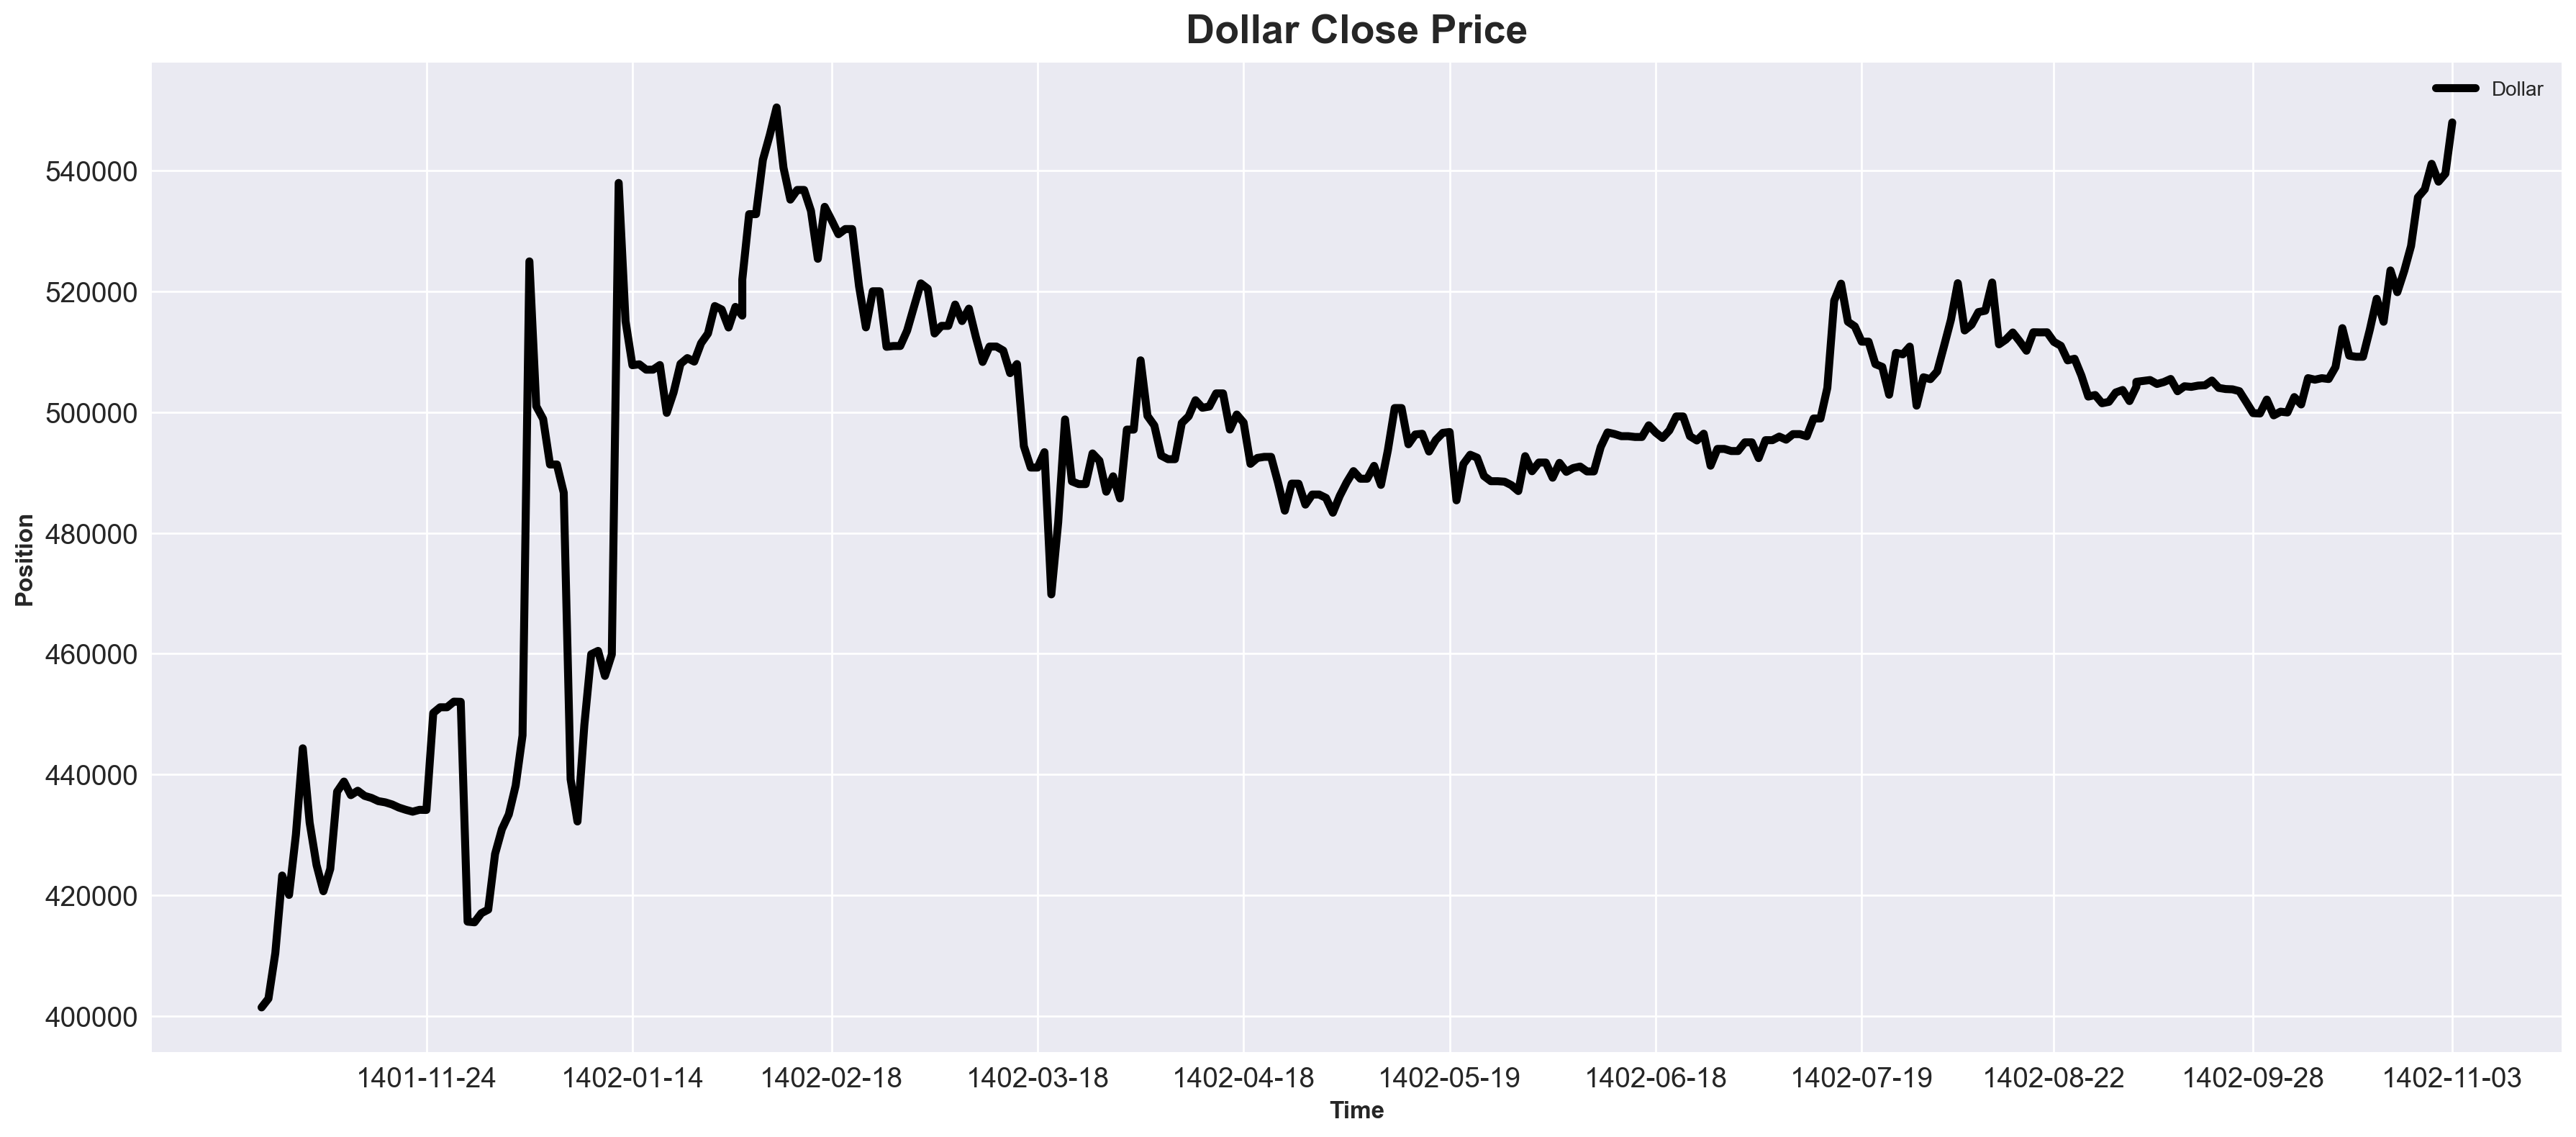

In [17]:
# Plotting
plt.plot(data['Close'], label='Dollar',linewidth=4,color='black')
plt.title('Dollar Close Price')
plt.xlabel('Time')
plt.ylabel('Position')
plt.xticks(data.index[::-30])
plt.legend()
save_fig('Dollar Close')
plt.show()

Saving figure Dollar EWM Andicator


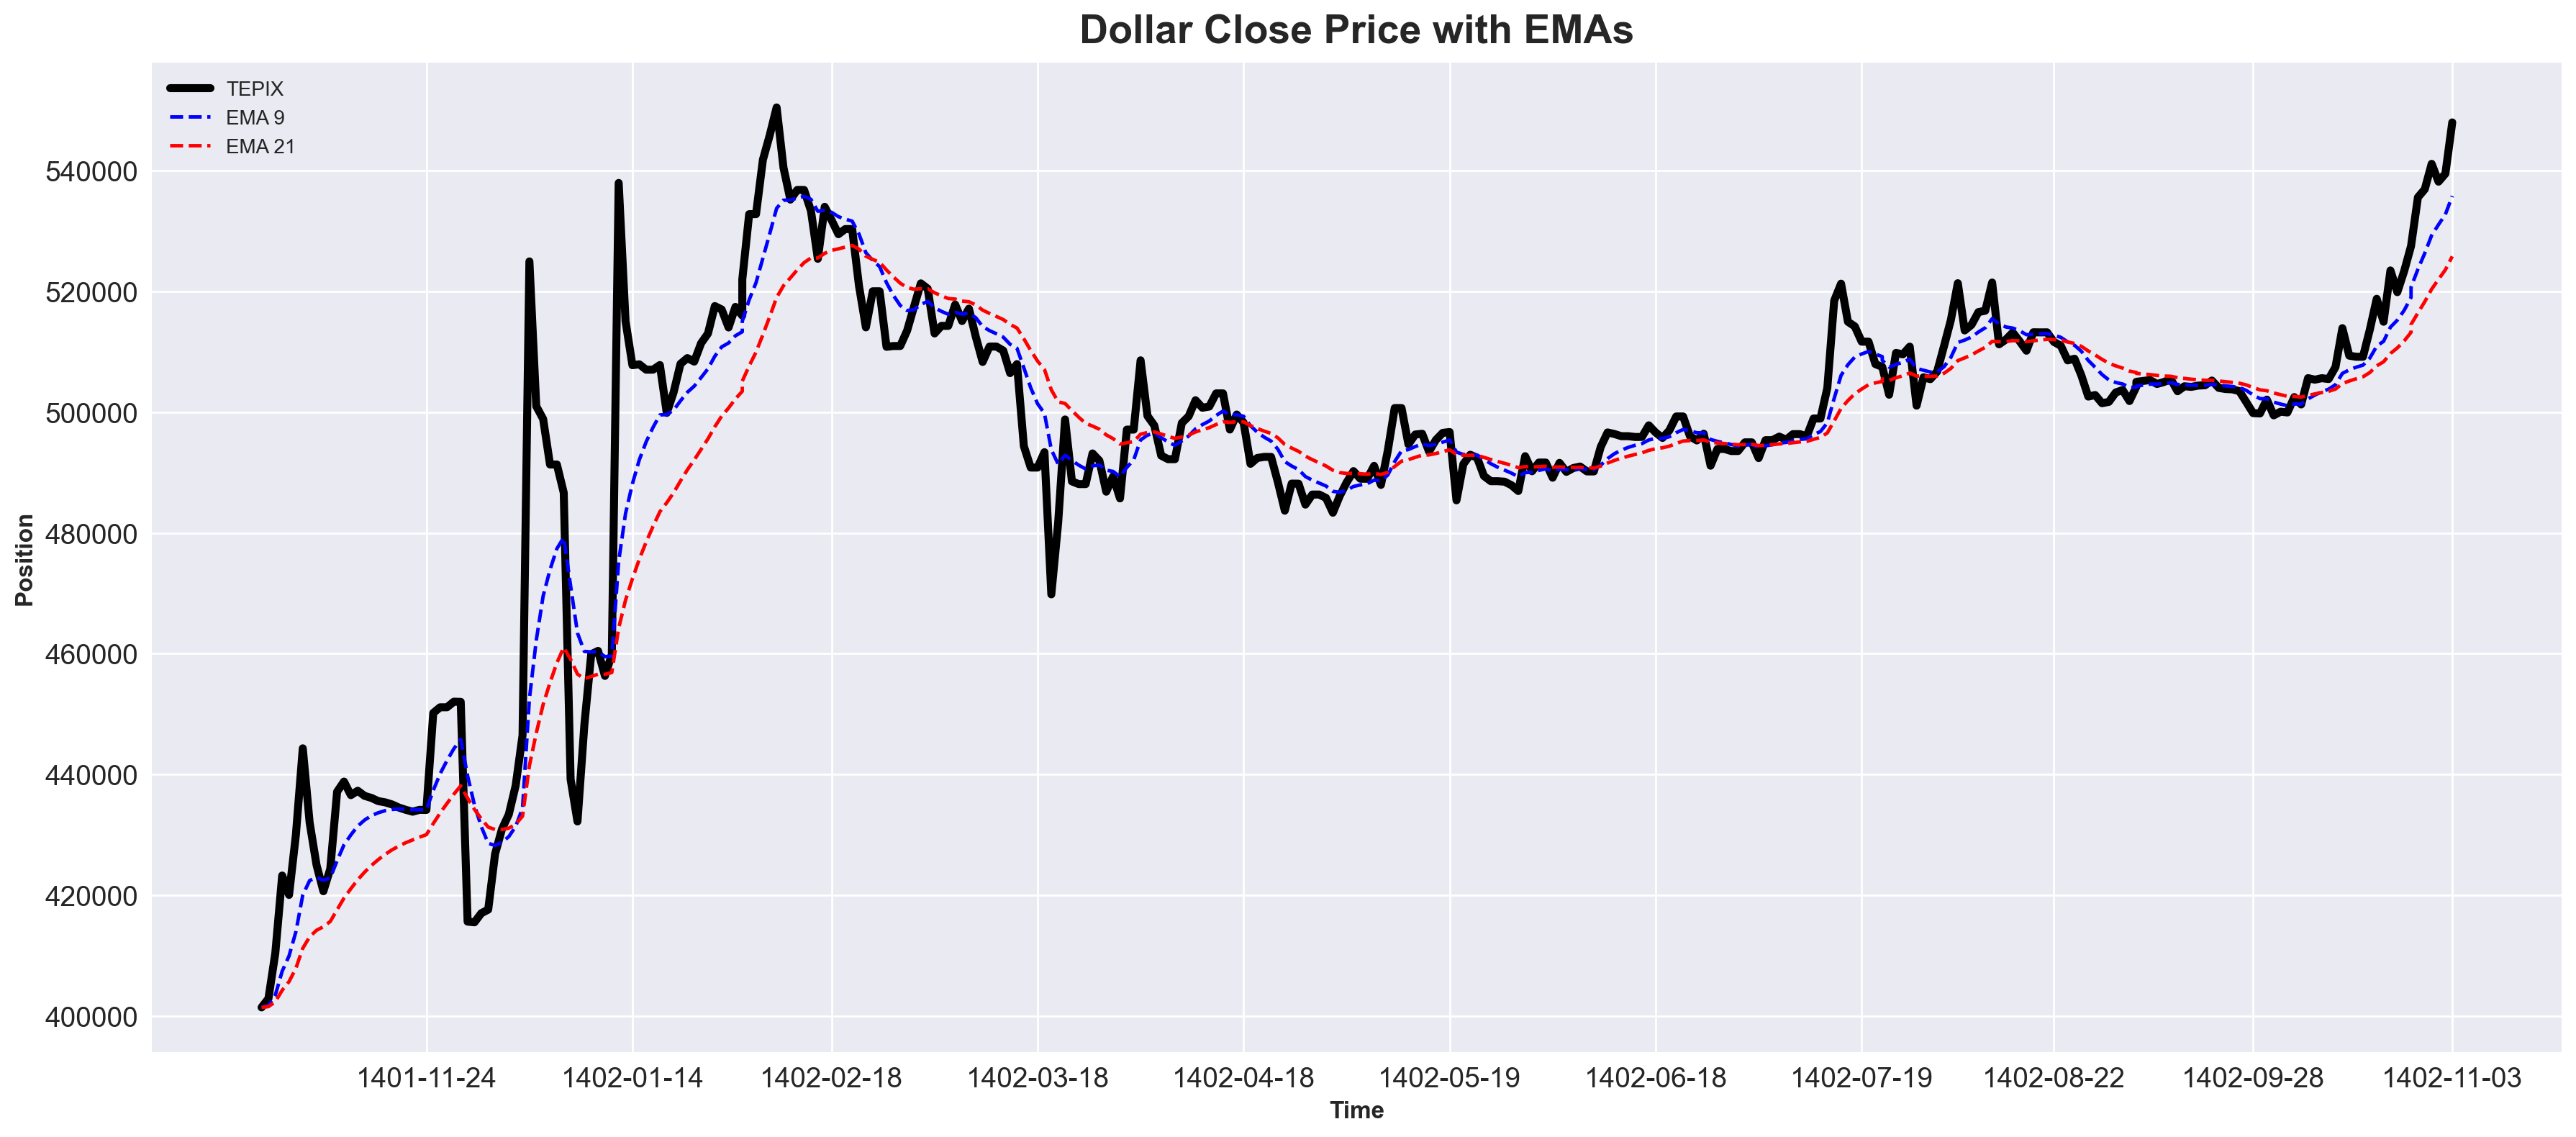

In [21]:
data['EMA_9'] = data['Close'].ewm(span=9, adjust=False).mean()
data['EMA_21'] = data['Close'].ewm(span=21, adjust=False).mean()

# Plot the original data and EMAs
plt.plot(data['Close'], label='TEPIX', linewidth=4, color='black')
plt.plot(data['EMA_9'], label='EMA 9', linestyle='--', color='blue')
plt.plot(data['EMA_21'], label='EMA 21', linestyle='--', color='red')

plt.title('Dollar Close Price with EMAs')
plt.xlabel('Time')
plt.ylabel('Position')
plt.xticks(data.index[::-30])
plt.legend()
save_fig('Dollar EWM Andicator')
plt.show()

In [23]:
data

Open    High     Low   Close          EMA_9         EMA_21
J-Date                                                                  
1401-10-24  402360  402800  400500  401390  401390.000000  401390.000000
1401-10-25  400850  402900  400560  402850  401682.000000  401522.727273
1401-10-26  406630  410600  406170  410390  403423.600000  402328.842975
1401-10-27  411290  423600  411100  423240  407386.880000  404229.857250
1401-10-28  419240  422400  418210  420030  409915.504000  405666.233864
...            ...     ...     ...     ...            ...            ...
1402-10-28  537070  540600  534000  536960  526358.261916  518329.432543
1402-10-30  535700  541550  534000  541170  529320.609533  520405.847767
1402-11-01  540020  542050  537200  538210  531098.487626  522024.407060
1402-11-02  538230  541540  535500  539540  532786.790101  523616.733691
1402-11-03  540810  548600  540020  548030  535835.432081  525836.121538

[325 rows x 6 columns]

In [26]:
import numpy as np
import pandas as pd

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Assuming 'Close' is the column containing closing prices in your DataFrame
data['RSI14'] = calculate_rsi(data['Close'], 14)
data['RSI30'] = calculate_rsi(data['Close'], 30)
data['RSI90'] = calculate_rsi(data['Close'], 90)

Saving figure RSI Numerical for Dollar


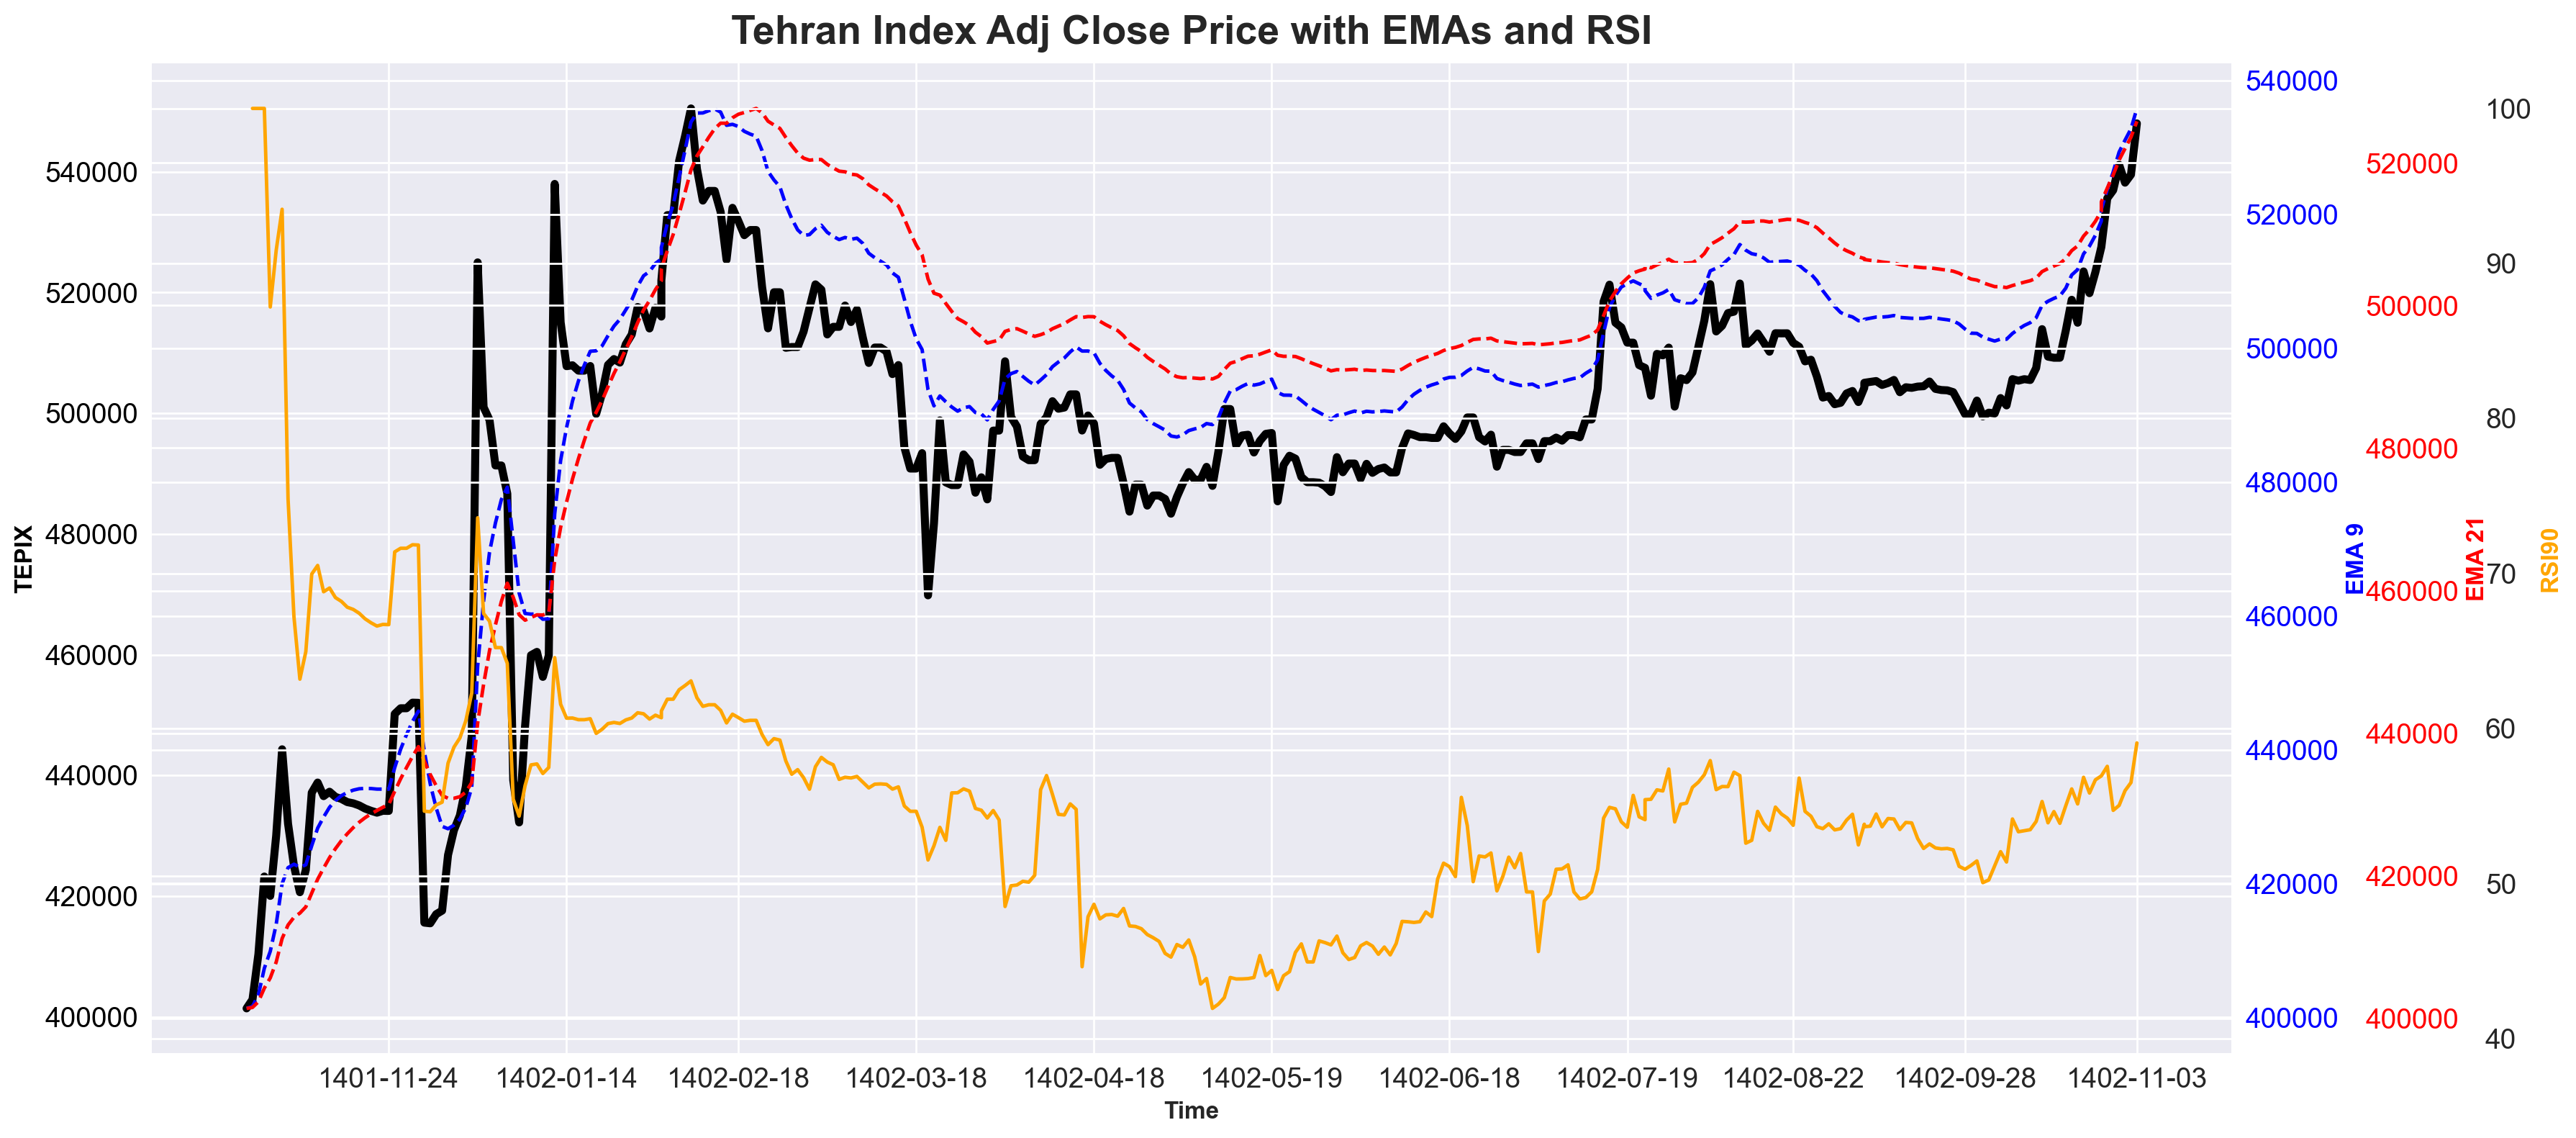

In [31]:
# Calculate EMAs with periods 9 and 21
data['EMA_9'] = data['Close'].ewm(span=9, adjust=False).mean()
data['EMA_21'] = data['Close'].ewm(span=21, adjust=False).mean()

# Calculate RSI with period 14 using talib


# Plot the original data, EMAs, and RSI
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('TEPIX', color='black')
ax1.plot(data['Close'], label='TEPIX', linewidth=4, color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EMA 9', color='blue')  
ax2.plot(data['EMA_9'], label='EMA 9', linestyle='--', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()  
color = 'tab:red'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('EMA 21', color='red')  
ax3.plot(data['EMA_21'], label='EMA 21', linestyle='--', color='red')
ax3.tick_params(axis='y', labelcolor='red')

ax4 = ax1.twinx()
color = 'tab:orange'
ax4.spines['right'].set_position(('outward', 120))
ax4.set_ylabel('RSI90', color='orange')  
ax4.plot(data['RSI90'], label='RSI', linestyle='-', color='orange')

fig.tight_layout()  
plt.title('Tehran Index Adj Close Price with EMAs and RSI')
plt.xticks(data.index[::-30])
save_fig('RSI Numerical for Dollar')
plt.show()

Saving figure RSI with Dollar and EWM


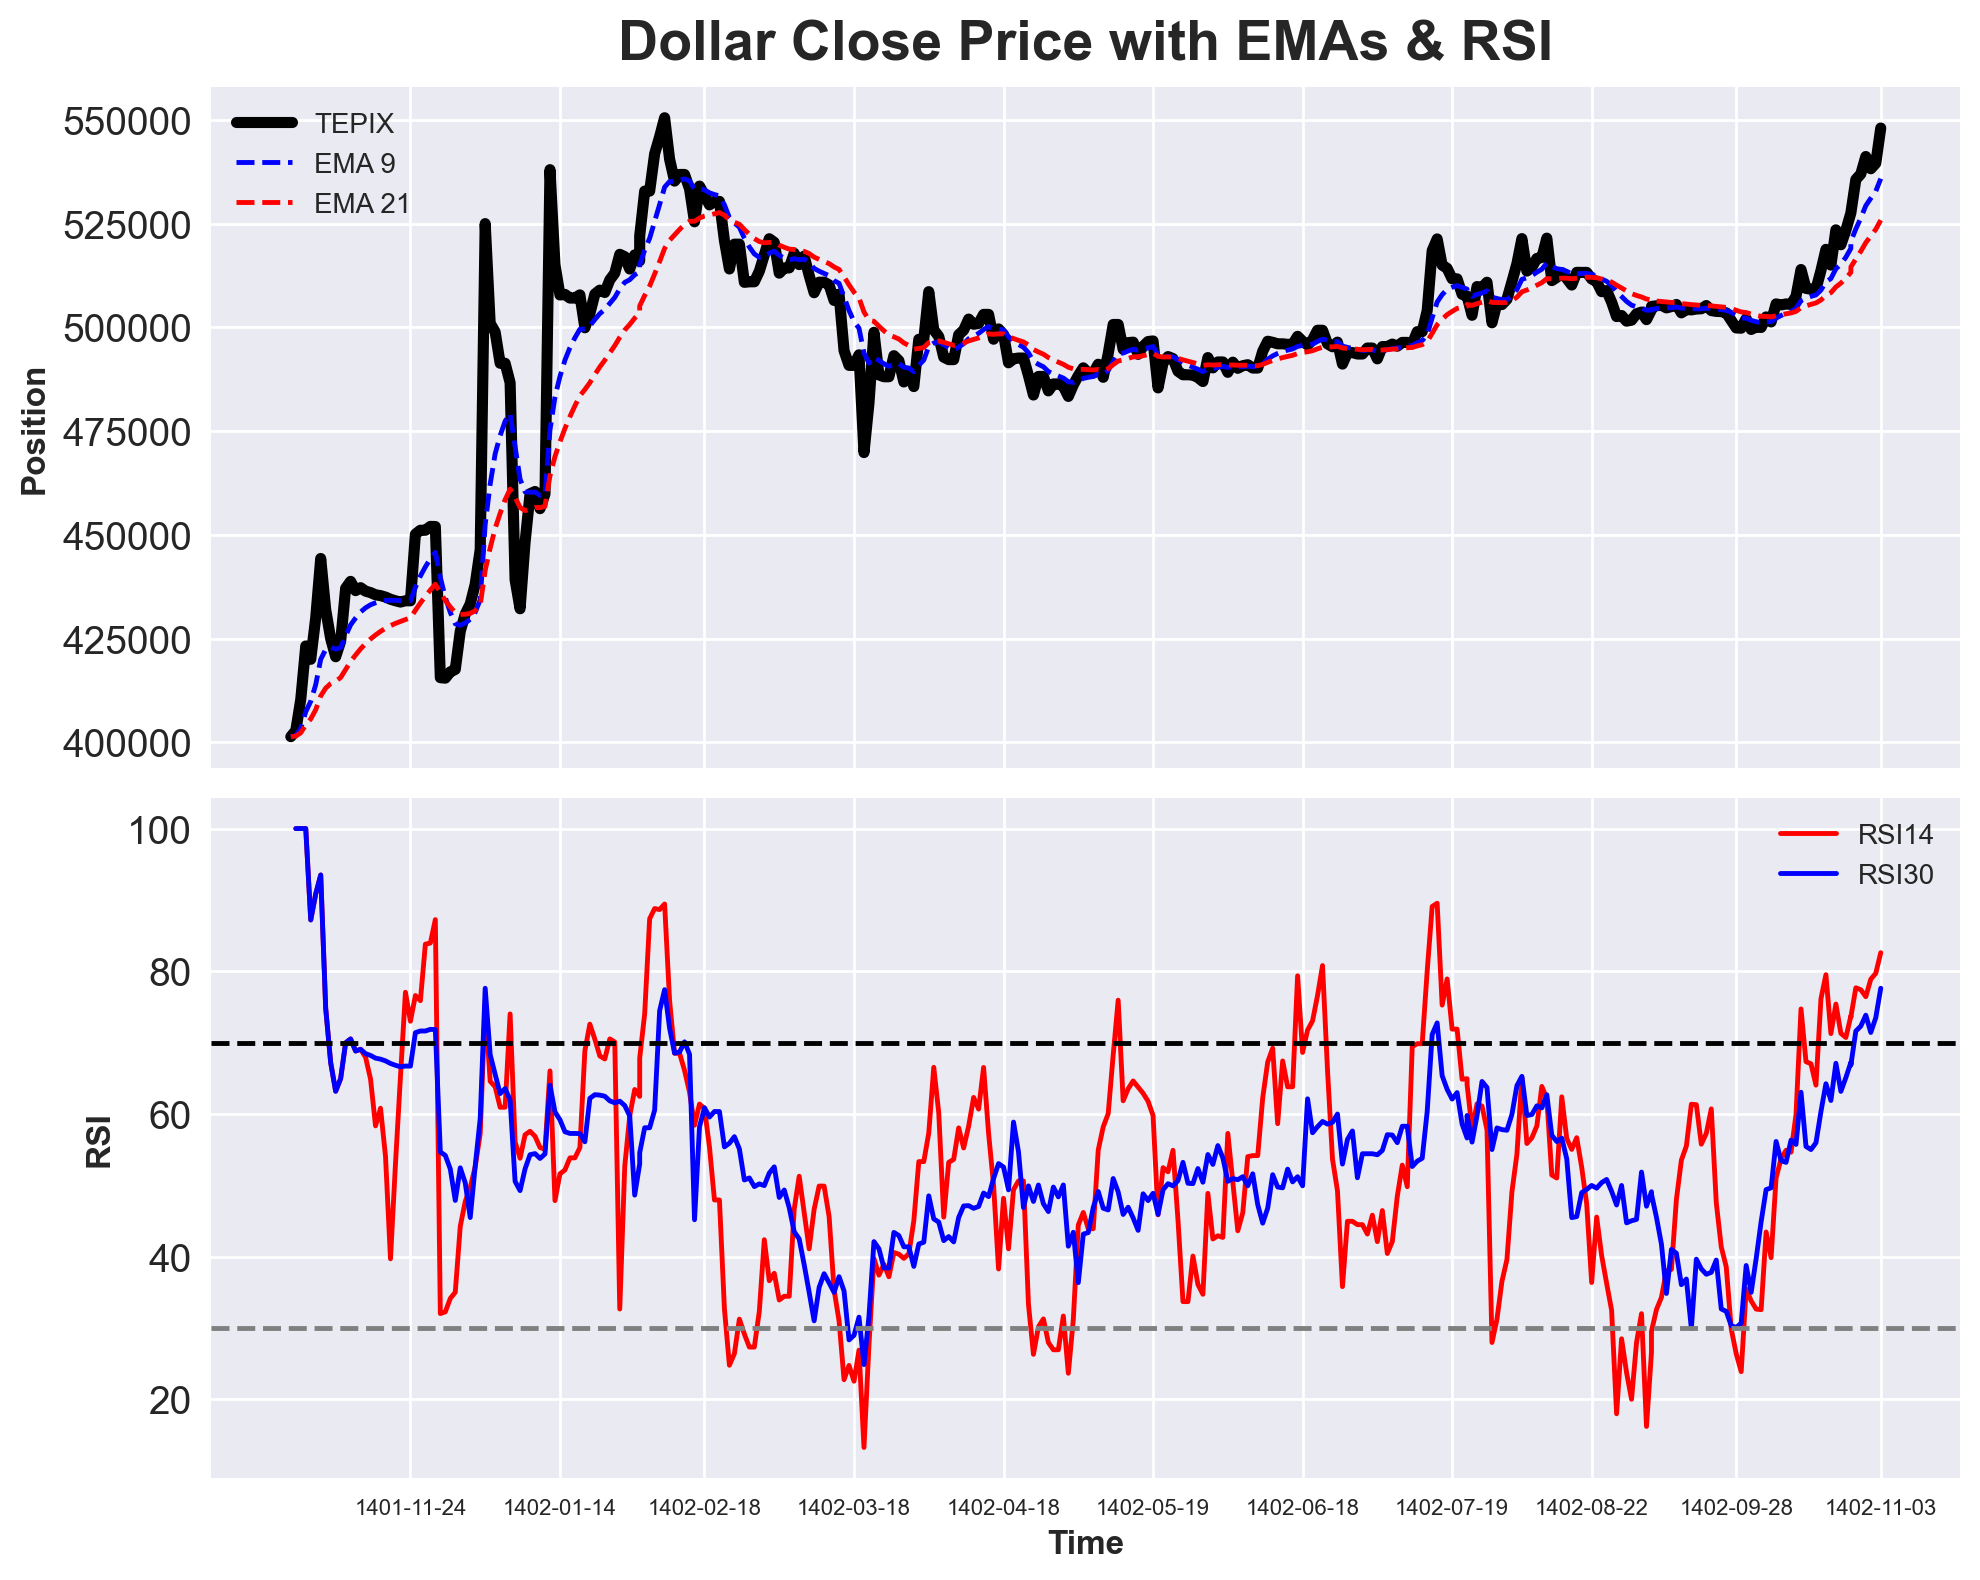

In [33]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot RSI values on the second subplot (ax1)
ax1.plot(data['RSI14'], label='RSI14', color='r')
ax1.plot(data['RSI30'], label='RSI30', color='b')
#ax1.plot(data['RSI120'], label='RSI120', color='g')

ax1.axhline(y=30, color='gray', linestyle='--')
ax1.axhline(y=70, color='black', linestyle='--')

ax1.set_ylabel('RSI')
ax1.legend()

# Plot TEPIX, EMAs on the first subplot (ax0)
ax0.plot(data['Close'], label='TEPIX', linewidth=4, color='black')
ax0.plot(data['EMA_9'], label='EMA 9', linestyle='--', color='blue')
ax0.plot(data['EMA_21'], label='EMA 21', linestyle='--', color='red')
ax0.set_title('Dollar Close Price with EMAs & RSI')
ax0.set_ylabel('Position')
ax0.legend()

# Customize x-axis ticks
ax0.set_xticks(data.index[::-30])
ax1.set_xticks(data.index[::-30])
ax0.tick_params(axis='x', labelsize=8)  # Adjust the font size here
ax1.tick_params(axis='x', labelsize=8)  # Adjust the font size here

# Display the plot
plt.xlabel('Time')
plt.tight_layout()
save_fig('RSI with Dollar and EWM')
plt.show()

In [34]:
data = data['Close'].pct_change().dropna(axis=0)

Saving figure ACF1


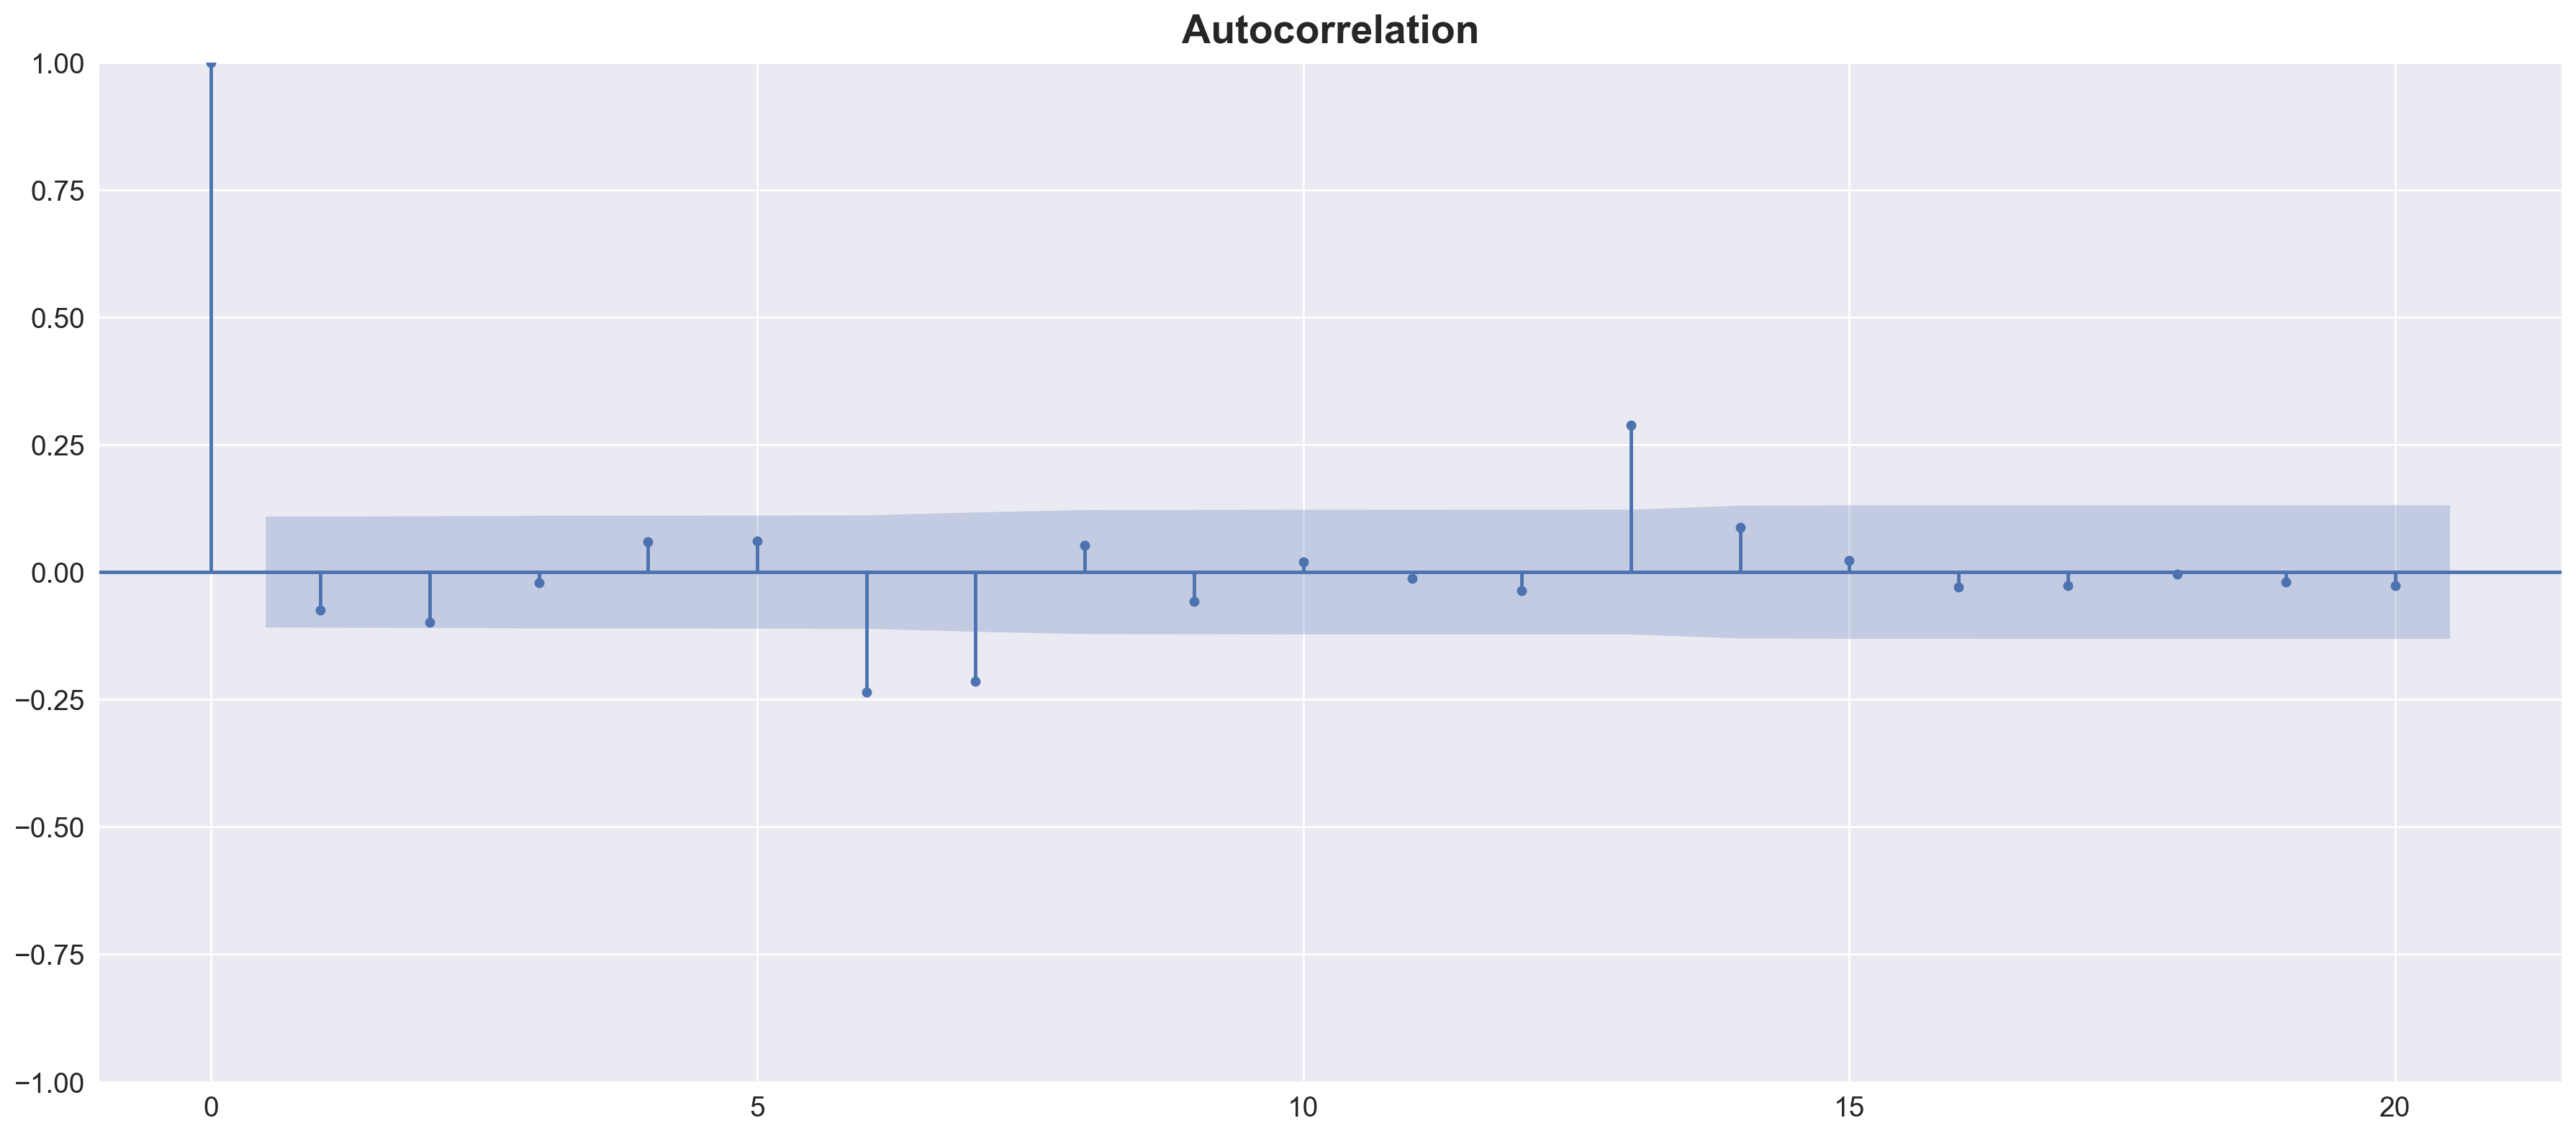

Saving figure ACF2


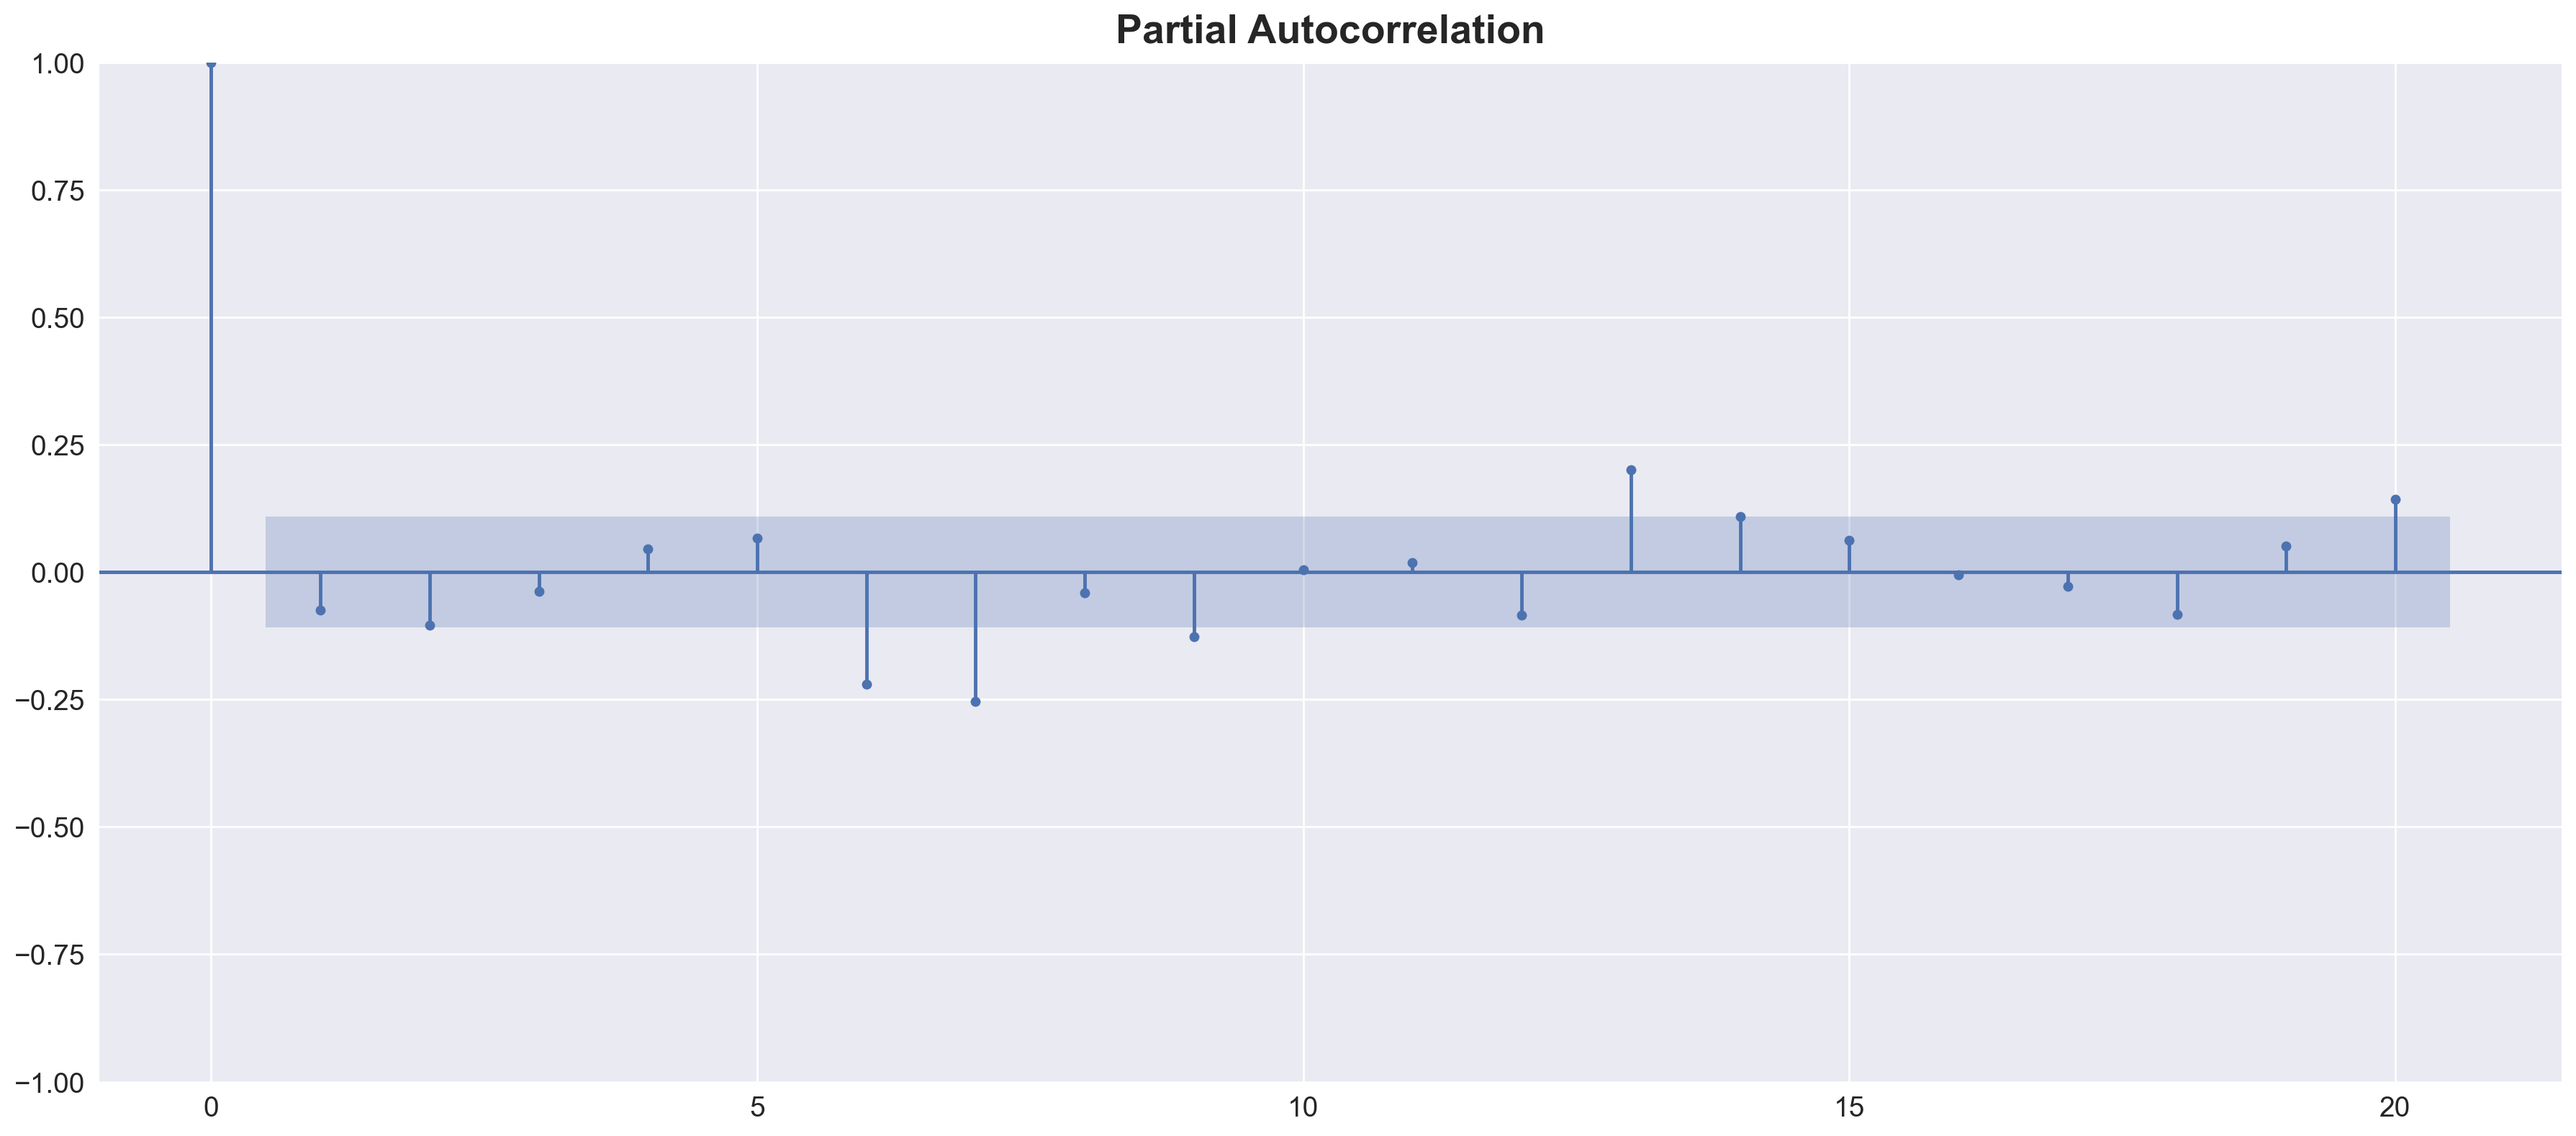

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Assuming 'data' is your time series data
acf_values = acf(data)
pacf_values = pacf(data)

# Plot ACF
plot_acf(data, lags=20)
save_fig('ACF1')
plt.show()

# Plot PACF
plot_pacf(data, lags=20)
save_fig('ACF2')
plt.show()

In [36]:
from statsmodels.tsa.arima.model import ARIMA
max_lag = 20
# Iterate over different lag orders and fit ARIMA models
for p in range(1, max_lag + 1):
    model = ARIMA(data, order=(p, 0, 0))
    results = model.fit()
    print(f'Order: {p}, AIC: {results.aic}, BIC: {results.bic}')

C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\t

Order: 1, AIC: -1666.4462063545384, BIC: -1655.1039758071613
Order: 2, AIC: -1667.9713130272594, BIC: -1652.84833896409
Order: 3, AIC: -1666.4359721621868, BIC: -1647.532254583225


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\t

Order: 4, AIC: -1665.119469616861, BIC: -1642.435008522107
Order: 5, AIC: -1664.4880008641462, BIC: -1638.0227962535998
Order: 6, AIC: -1678.7659411824336, BIC: -1648.519993056095


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 7, AIC: -1698.9621923190148, BIC: -1664.9355006768837


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\st

Order: 8, AIC: -1697.5368314549742, BIC: -1659.729396297051
Order: 9, AIC: -1701.315871726105, BIC: -1659.7276930523892


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 10, AIC: -1699.2963131585334, BIC: -1653.9273909690255


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 11, AIC: -1697.3897490150355, BIC: -1648.2400833097352


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 12, AIC: -1698.2196154779454, BIC: -1645.2892062568528


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 13, AIC: -1709.0603178301853, BIC: -1652.3491650933004


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 14, AIC: -1711.0107015474491, BIC: -1650.518805294772


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 15, AIC: -1710.0986150029698, BIC: -1645.8259752345002


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 16, AIC: -1708.1130499547073, BIC: -1640.0596666704455


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\st

Order: 17, AIC: -1706.4853902159914, BIC: -1634.6512634159371
Order: 18, AIC: -1707.0797349716431, BIC: -1631.4648646557966


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\st

Order: 19, AIC: -1705.9582876227573, BIC: -1626.5626737911184
Order: 20, AIC: -1711.9253191811079, BIC: -1628.7489618336767


In [37]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Split data into training and validation sets
train_size = int(len(data) * 0.8)
train, valid = data[0:train_size], data[train_size:]

best_order = None
best_rmse = float('inf')

# Iterate over different lag orders
for p in range(1, max_lag + 1):
    model = ARIMA(train, order=(p, 0, 0))
    results = model.fit()
    forecast = results.forecast(steps=len(valid))
    rmse = mean_squared_error(valid, forecast, squared=False)

    print(f'Order: {p}, RMSE: {rmse}')

    # Update best order if current model is better
    if rmse < best_rmse:
        best_rmse = rmse
        best_order = p

print(f'Best Order: {best_order}')

Order: 1, RMSE: 0.005343286573872588
Order: 2, RMSE: 0.005336000933710203


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site

Order: 3, RMSE: 0.005336704540394542
Order: 4, RMSE: 0.005325431728638544
Order: 5, RMSE: 0.005344778536501893


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 6, RMSE: 0.005411742797346716


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 7, RMSE: 0.005412197390504009


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 8, RMSE: 0.005410748590477718


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site

Order: 9, RMSE: 0.00544720330857778
Order: 10, RMSE: 0.005447903177667075


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 11, RMSE: 0.005443161546054826


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 12, RMSE: 0.005491528551256995


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 13, RMSE: 0.005508862101454838


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 14, RMSE: 0.005501362132230187


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order: 15, RMSE: 0.005487980759110486


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Loca

Order: 16, RMSE: 0.005488548108111409


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Loca

Order: 17, RMSE: 0.005477209771804325


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Loca

Order: 18, RMSE: 0.005469205111906198


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P.sarafinezhad\AppData\Loca

Order: 19, RMSE: 0.005467684699686234
Order: 20, RMSE: 0.005502952609101612
Best Order: 4


C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P.sarafinezhad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [38]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat({f'y_lag_{i}': ts.shift(i)for i in range(lead_time, lags + lead_time)},axis=1)
# Four weeks of lag features
y = data.copy()
X = make_lags(y, lags=4).fillna(0.0)
def make_multistep_target(ts, steps):
    return pd.concat({f'y_step_{i + 1}': ts.shift(-i)for i in range(steps)},axis=1)
# Eight-week forecast
y = make_multistep_target(y, steps=60).dropna()
# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
Y, X = y.align(X, join='inner', axis=0)

In [39]:
Y

y_step_1  y_step_2  y_step_3  y_step_4  y_step_5  y_step_6  \
J-Date                                                                   
1401-10-25  0.003637  0.018717  0.031312 -0.007584  0.023808  0.033230   
1401-10-26  0.018717  0.031312 -0.007584  0.023808  0.033230 -0.027728   
1401-10-27  0.031312 -0.007584  0.023808  0.033230 -0.027728 -0.016204   
1401-10-28 -0.007584  0.023808  0.033230 -0.027728 -0.016204 -0.010259   
1401-10-30  0.023808  0.033230 -0.027728 -0.016204 -0.010259  0.008796   
...              ...       ...       ...       ...       ...       ...   
1402-08-18  0.005998 -0.000039  0.000019 -0.003098 -0.001251 -0.004736   
1402-08-20 -0.000039  0.000019 -0.003098 -0.001251 -0.004736  0.000531   
1402-08-21  0.000019 -0.003098 -0.001251 -0.004736  0.000531 -0.005483   
1402-08-22 -0.003098 -0.001251 -0.004736  0.000531 -0.005483 -0.006876   
1402-08-23 -0.001251 -0.004736  0.000531 -0.005483 -0.006876  0.000517   

            y_step_7  y_step_8  y_step_9  y_step_10  ...  y_step_51  \
J-Date                                               ...              
1401-10-25 -0.027728 -0.016204 -0.010259   0.008796  ...   0.007802   
1401-10-26 -0.016204 -0.010259  0.008796   0.030141  ...   0.169870   
1401-10-27 -0.010259  0.008796  0.030141   0.003843  ...  -0.042565   
1401-10-28  0.008796  0.030141  0.003843  -0.005128  ...  -0.014172   
1401-10-30  0.030141  0.003843 -0.005128   0.001672  ...   0.000295   
...              ...       ...       ...        ...  ...        ...   
1402-08-18  0.000531 -0.005483 -0.006876   0.000517  ...   0.008837   
1402-08-20 -0.005483 -0.006876  0.000517  -0.002705  ...   0.009928   
1402-08-21 -0.006876  0.000517 -0.002705   0.000459  ...  -0.007325   
1402-08-22  0.000517 -0.002705  0.000459   0.003089  ...   0.016505   
1402-08-23 -0.002705  0.000459  0.003089   0.000815  ...  -0.006877   

            y_step_52  y_step_53  y_step_54  y_step_55  y_step_56  y_step_57  \
J-Date                                                                         
1401-10-25   0.169870  -0.042565  -0.014172   0.000295  -0.001752   0.000000   
1401-10-26  -0.042565  -0.014172   0.000295  -0.001752   0.000000   0.001519   
1401-10-27  -0.014172   0.000295  -0.001752   0.000000   0.001519  -0.015615   
1401-10-28   0.000295  -0.001752   0.000000   0.001519  -0.015615   0.006821   
1401-10-30  -0.001752   0.000000   0.001519  -0.015615   0.006821   0.009358   
...               ...        ...        ...        ...        ...        ...   
1402-08-18   0.009928  -0.007325   0.016505  -0.006877   0.006732   0.007929   
1402-08-20  -0.007325   0.016505  -0.006877   0.006732   0.007929   0.000000   
1402-08-21   0.016505  -0.006877   0.006732   0.007929   0.000000   0.015297   
1402-08-22  -0.006877   0.006732   0.007929   0.000000   0.015297   0.002502   
1402-08-23   0.006732   0.007929   0.000000   0.015297   0.002502   0.007840   

            y_step_58  y_step_59  y_step_60  
J-Date                                       
1401-10-25   0.001519  -0.015615   0.006821  
1401-10-26  -0.015615   0.006821   0.009358  
1401-10-27   0.006821   0.009358   0.001890  
1401-10-28   0.009358   0.001890  -0.001140  
1401-10-30   0.001890  -0.001140   0.005980  
...               ...        ...        ...  
1402-08-18   0.000000   0.015297   0.002502  
1402-08-20   0.015297   0.002502   0.007840  
1402-08-21   0.002502   0.007840  -0.005470  
1402-08-22   0.007840  -0.005470   0.002471  
1402-08-23  -0.005470   0.002471   0.015736  

[273 rows x 60 columns]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X is your feature matrix and Y is a DataFrame with multiple response columns
# Adjust the code based on your specific dataset and model

# Step 1: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

best_r2 = -1  # Initialize with a value that any valid R2 would exceed
best_y_column = None

# Step 5: Selecting Y Columns
for column in Y.columns:
    # Step 2: Model Training
    model = LinearRegression()
    model.fit(X_train, Y_train[column])

    # Step 3: Prediction
    predictions = model.predict(X_test)

    # Step 4: Performance Evaluation
    r2 = r2_score(Y_test[column], predictions)

    # You can also use RMSE instead of R2
    # rmse = mean_squared_error(Y_test[column], predictions, squared=False)

    # Step 6: Choose Best Y Column
    if r2 > best_r2:
        best_r2 = r2
        best_y_column = column

print("Best Y Column:", best_y_column)
print("Best R2 Score:", best_r2)

Best Y Column: y_step_3
Best R2 Score: 0.15382821302684613


In [41]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [42]:
Y = Y['y_step_3']

In [43]:
validation_size = 0.2
train_size = int(len(X)*(1-validation_size))
X_train,X_test = X[0:train_size],X[train_size:len(X)]
Y_train,Y_test = Y[0:train_size],Y[train_size:len(X)]

In [44]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('SVR',SVR()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('MLP',MLPRegressor()))
models.append(('RFR',RandomForestRegressor()))
models.append(('GBR',GradientBoostingRegressor()))
models.append(('ABR',AdaBoostRegressor()))
models.append(('ETR',ExtraTreesRegressor()))
models.append(('KNN',KNeighborsRegressor()))

In [45]:
names = []
kfold_results = []
train_results = []
test_results = []
for name, model in models:
        names.append(name)
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_results = -1 * cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        kfold_results.append(cv_results)

        res = model.fit(X_train, Y_train)

        train_result = mean_squared_error(res.predict(X_train), Y_train)
        train_results.append(train_result)

        test_result = mean_squared_error(res.predict(X_test), Y_test)
        test_results.append(test_result)

        msg = '%s %f (%f) %f %f' % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
        print(msg)

LR 0.000503 (0.000791) 0.000451 0.000064
LASSO 0.000482 (0.000806) 0.000480 0.000066
EN 0.000482 (0.000806) 0.000480 0.000066
SVR 0.003916 (0.000557) 0.003950 0.004387
CART 0.000841 (0.001390) 0.000002 0.000104
MLP 0.001340 (0.001581) 0.000574 0.000152
RFR 0.000781 (0.001153) 0.000104 0.000081
GBR 0.000969 (0.001329) 0.000043 0.000079
ABR 0.000733 (0.001251) 0.000128 0.000102
ETR 0.000772 (0.001109) 0.000002 0.000070
KNN 0.000599 (0.000885) 0.000351 0.000086


In [46]:
X

y_lag_1   y_lag_2   y_lag_3   y_lag_4
J-Date                                            
1401-10-25  0.000000  0.000000  0.000000  0.000000
1401-10-26  0.003637  0.000000  0.000000  0.000000
1401-10-27  0.018717  0.003637  0.000000  0.000000
1401-10-28  0.031312  0.018717  0.003637  0.000000
1401-10-30 -0.007584  0.031312  0.018717  0.003637
...              ...       ...       ...       ...
1402-08-18 -0.003068 -0.002825  0.002285  0.001545
1402-08-20  0.005998 -0.003068 -0.002825  0.002285
1402-08-21 -0.000039  0.005998 -0.003068 -0.002825
1402-08-22  0.000019 -0.000039  0.005998 -0.003068
1402-08-23 -0.003098  0.000019 -0.000039  0.005998

[273 rows x 4 columns]

In [47]:
import statsmodels.api as sm
best_period = None
best_variance = np.inf

# Try different period values
for period in range(2, 11):
    res = sm.tsa.seasonal_decompose(Y, period=period)
    current_variance = np.var(res.resid.dropna())
    
    # Update best_period if the current period gives lower variance
    if current_variance < best_variance:
        best_variance = current_variance
        best_period = period

print(f"The best period is: {best_period}")

The best period is: 2


Saving figure Index Seasonal


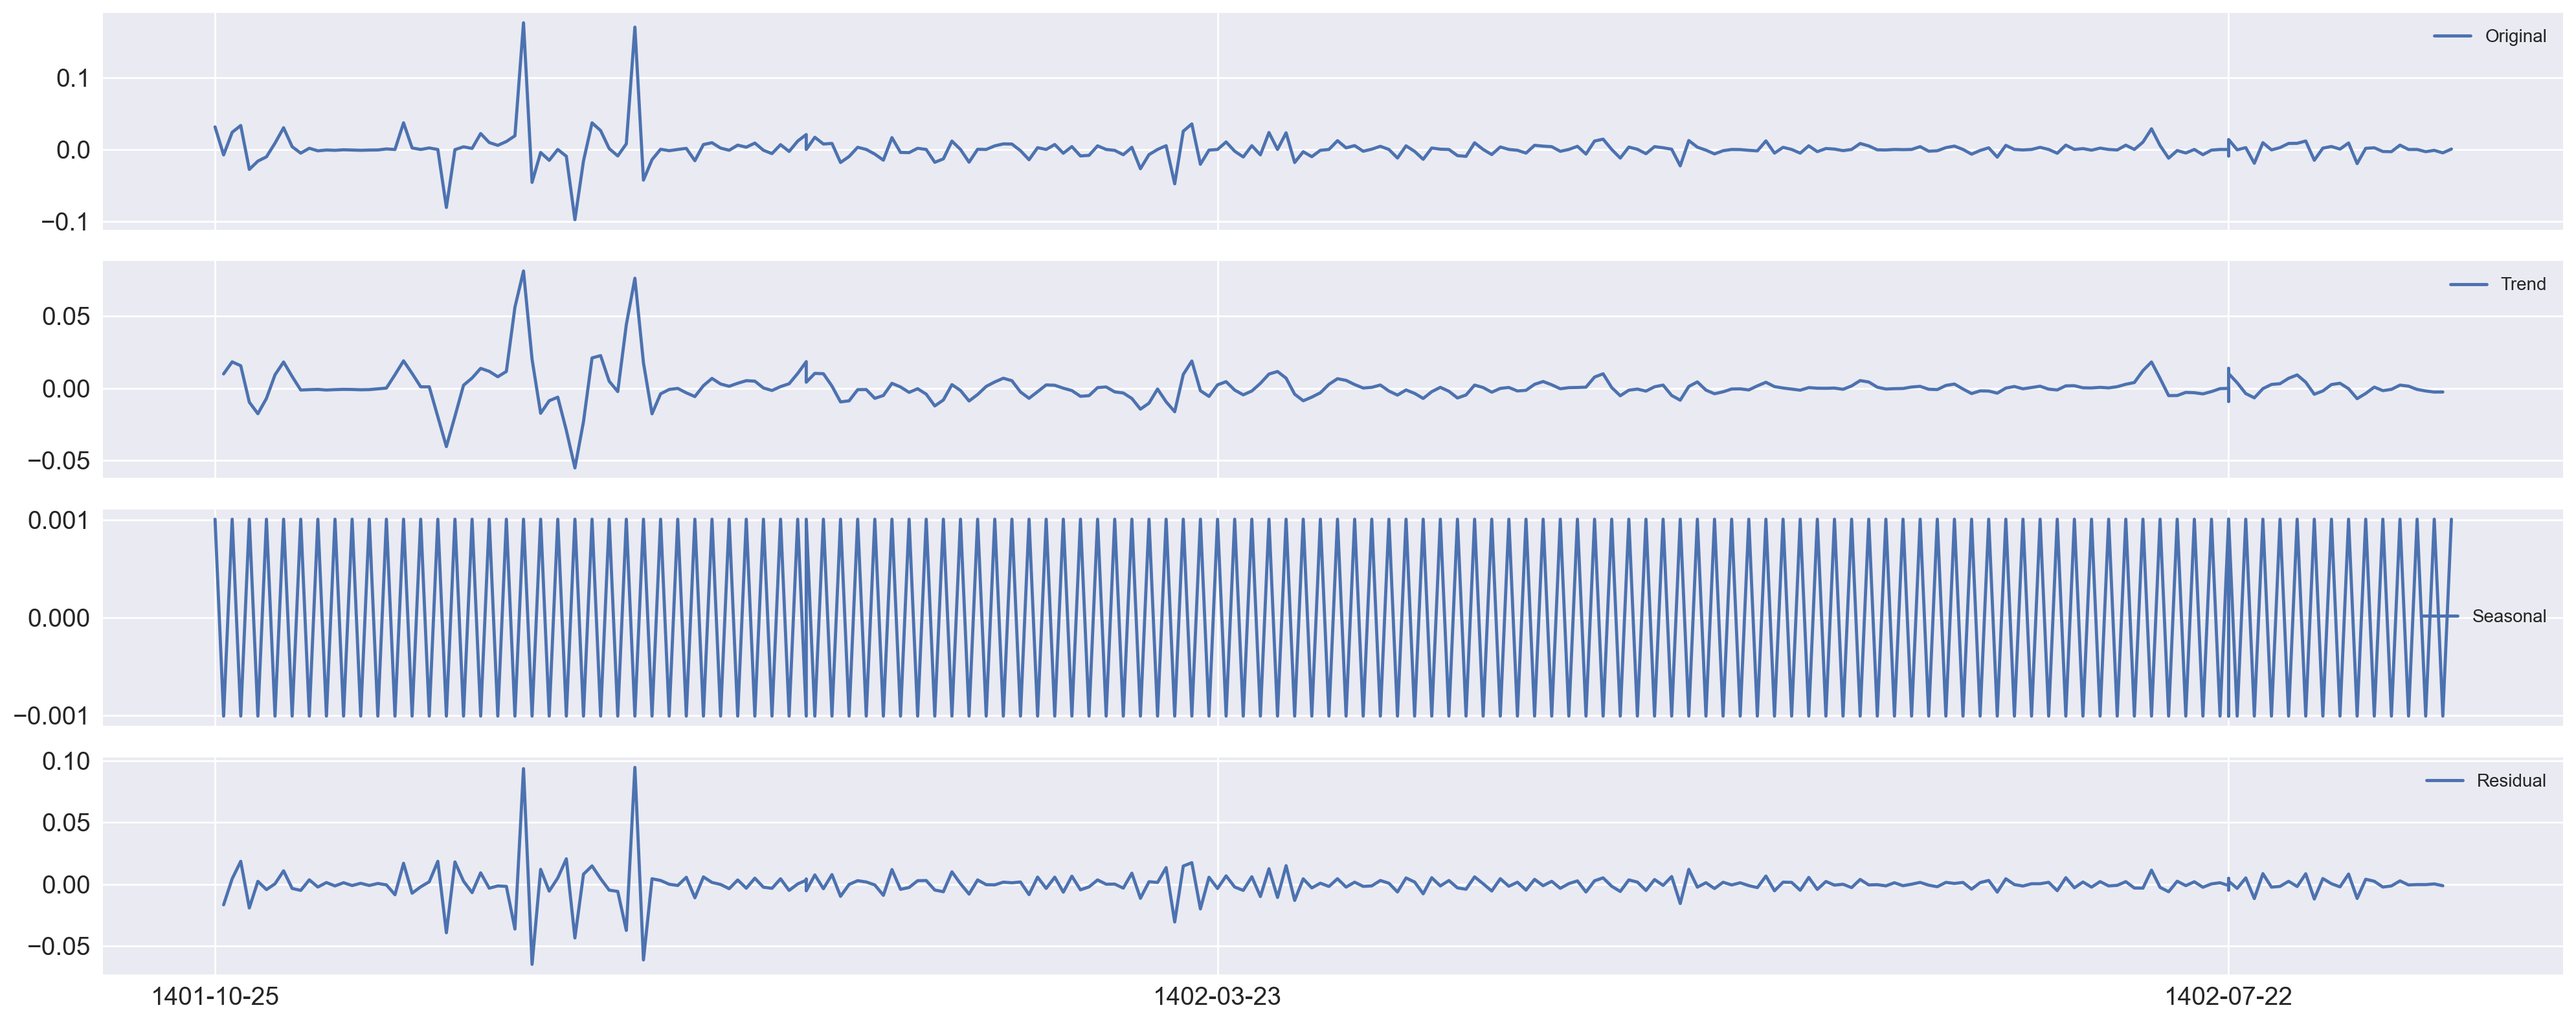

In [48]:
# Assuming Y is your time series data
res = sm.tsa.seasonal_decompose(Y, period=2)

# Adjust the figure size and layout
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

# Plot the original time series
ax1.plot(Y.index, Y, label='Original')
ax1.legend()

# Plot the trend component
ax2.plot(res.trend, label='Trend')
ax2.legend()

# Plot the seasonal component
ax3.plot(res.seasonal, label='Seasonal')
ax3.legend()

# Plot the residual component
ax4.plot(res.resid, label='Residual')
ax4.legend()

# Set x-axis ticks
plt.xticks(Y.index[::120])
save_fig('Index Seasonal')
plt.show()

In [49]:
# Assuming 'data' is a DataFrame with a 'Date' index and a 'Value' column
# and you want to decompose it using seasonal_decompose
result = sm.tsa.seasonal_decompose(Y, period=2)

# Extract the seasonal component
seasonal_component = result.seasonal

# Find the top and bottom values
top_value = seasonal_component.max()
bottom_value = seasonal_component.min()

print(f"Top value of the seasonal component: {top_value}")
print(f"Bottom value of the seasonal component: {bottom_value}")


Top value of the seasonal component: 0.0010083050883237226
Bottom value of the seasonal component: -0.0010083050883237226


Saving figure Best Models with Box Plot


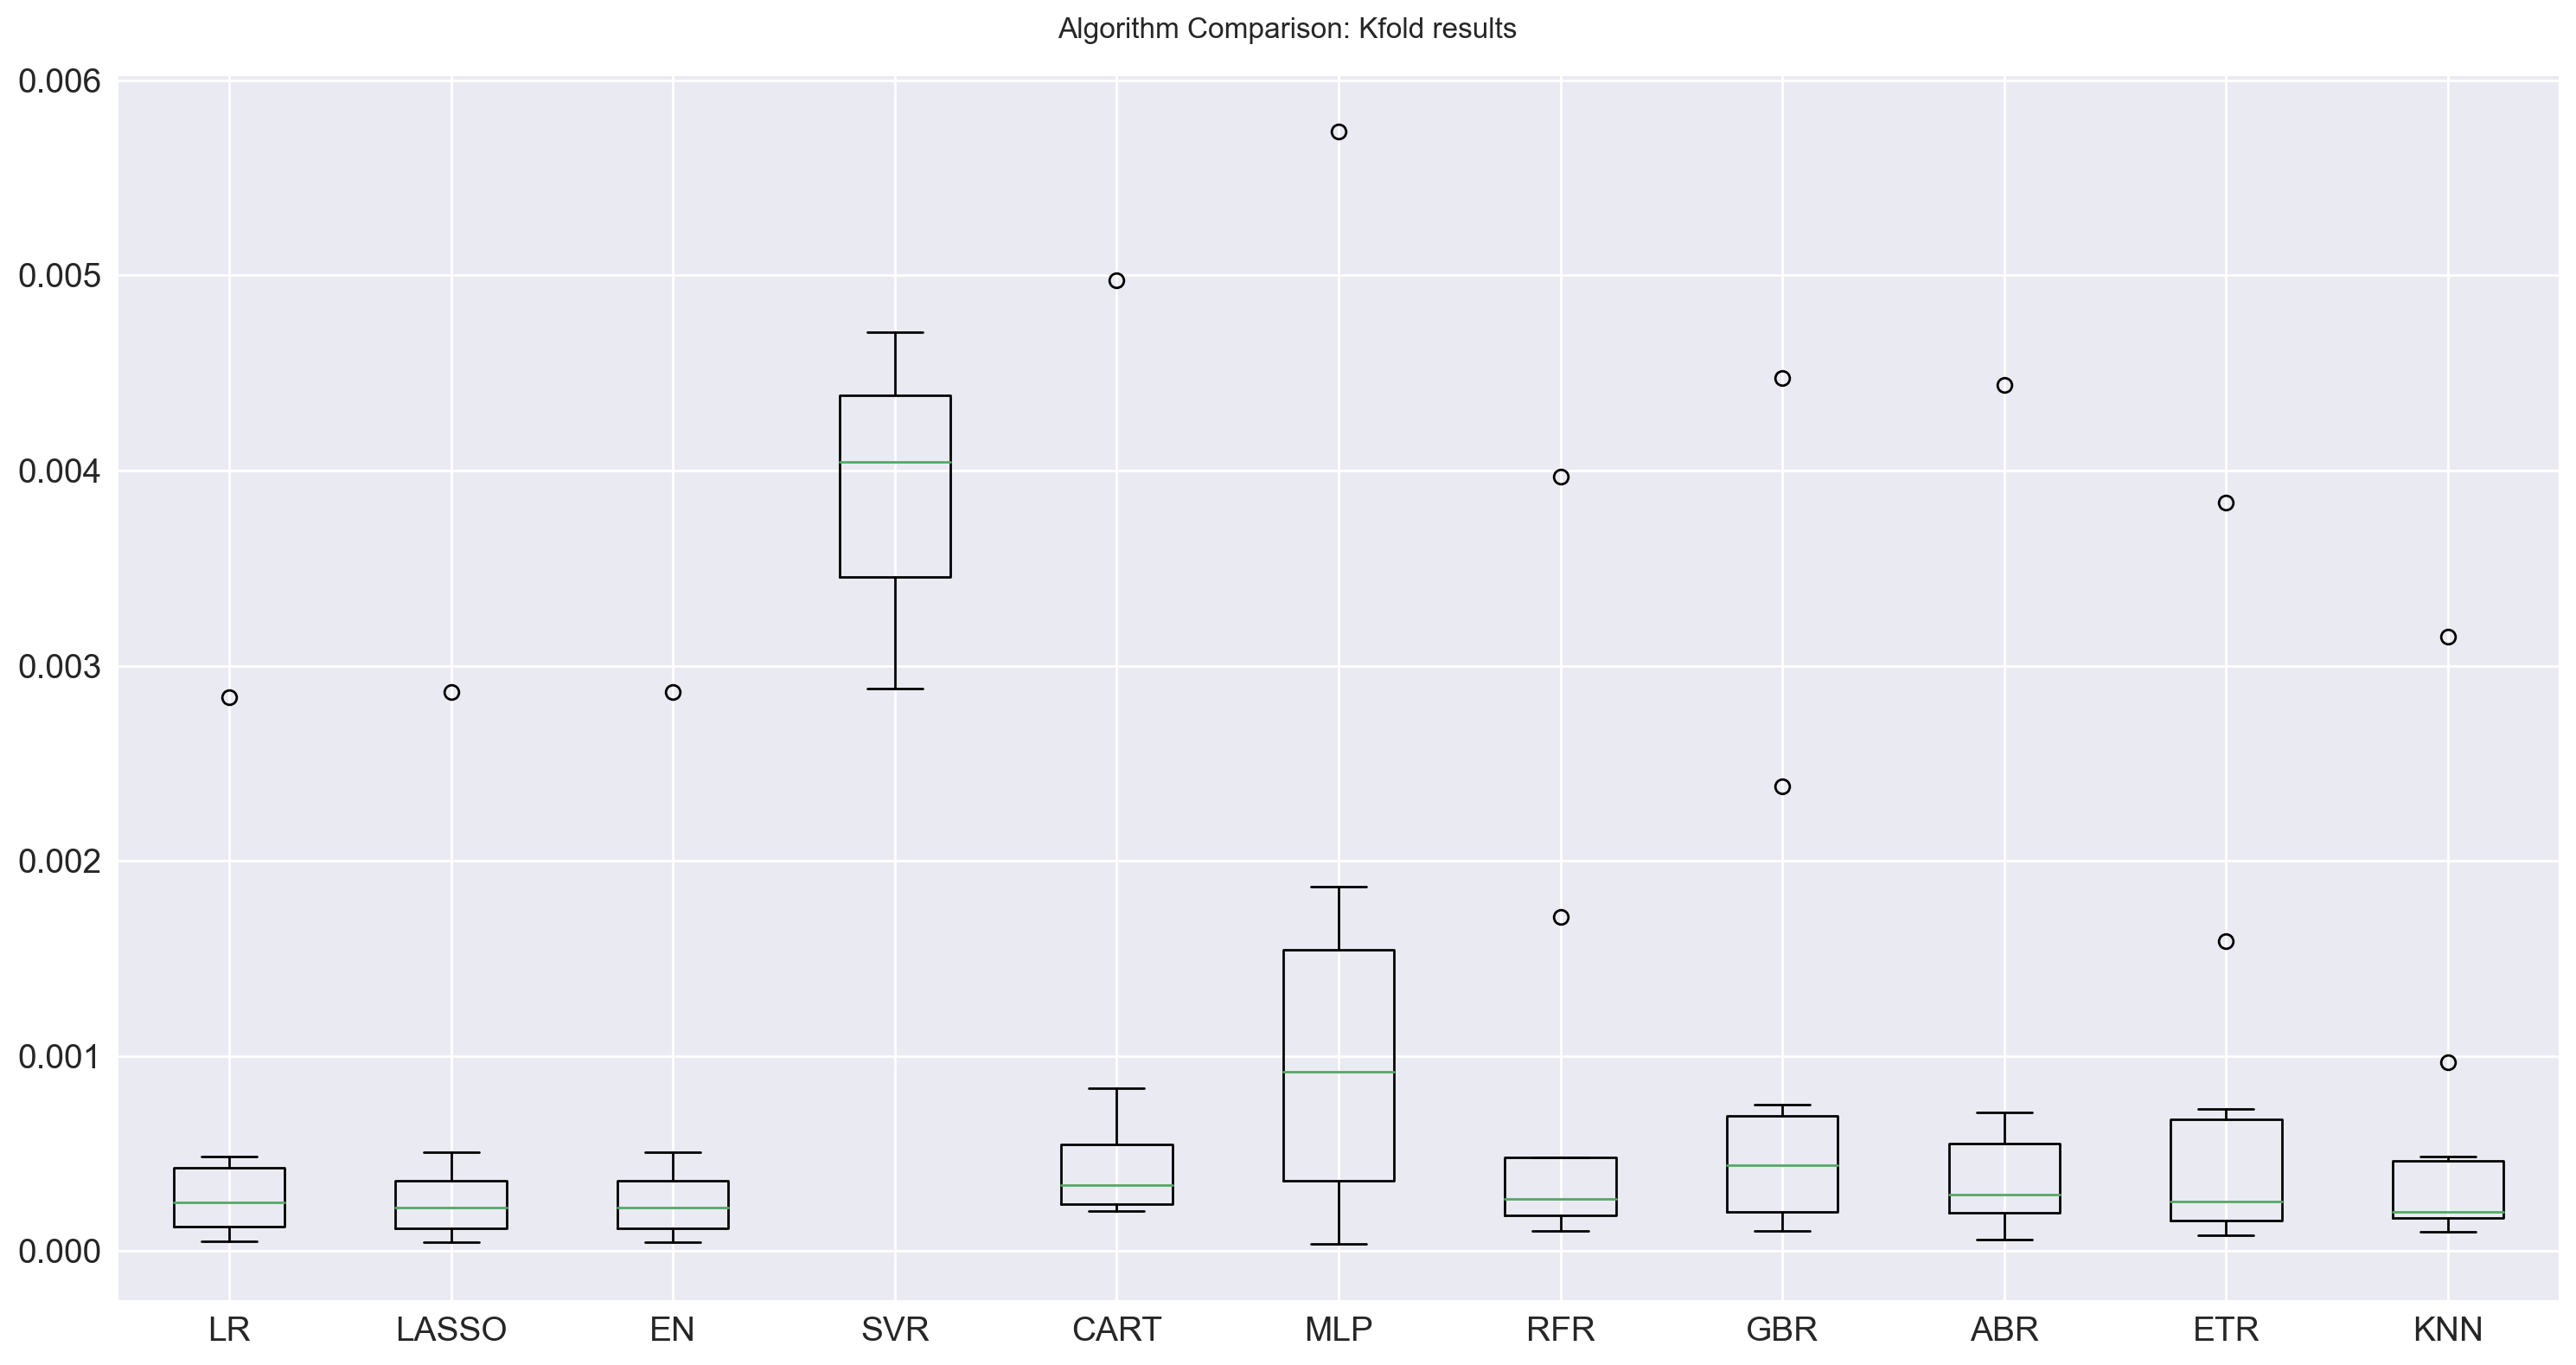

In [51]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
save_fig('Best Models with Box Plot')
plt.show()

Saving figure Best Model with Bar Plot


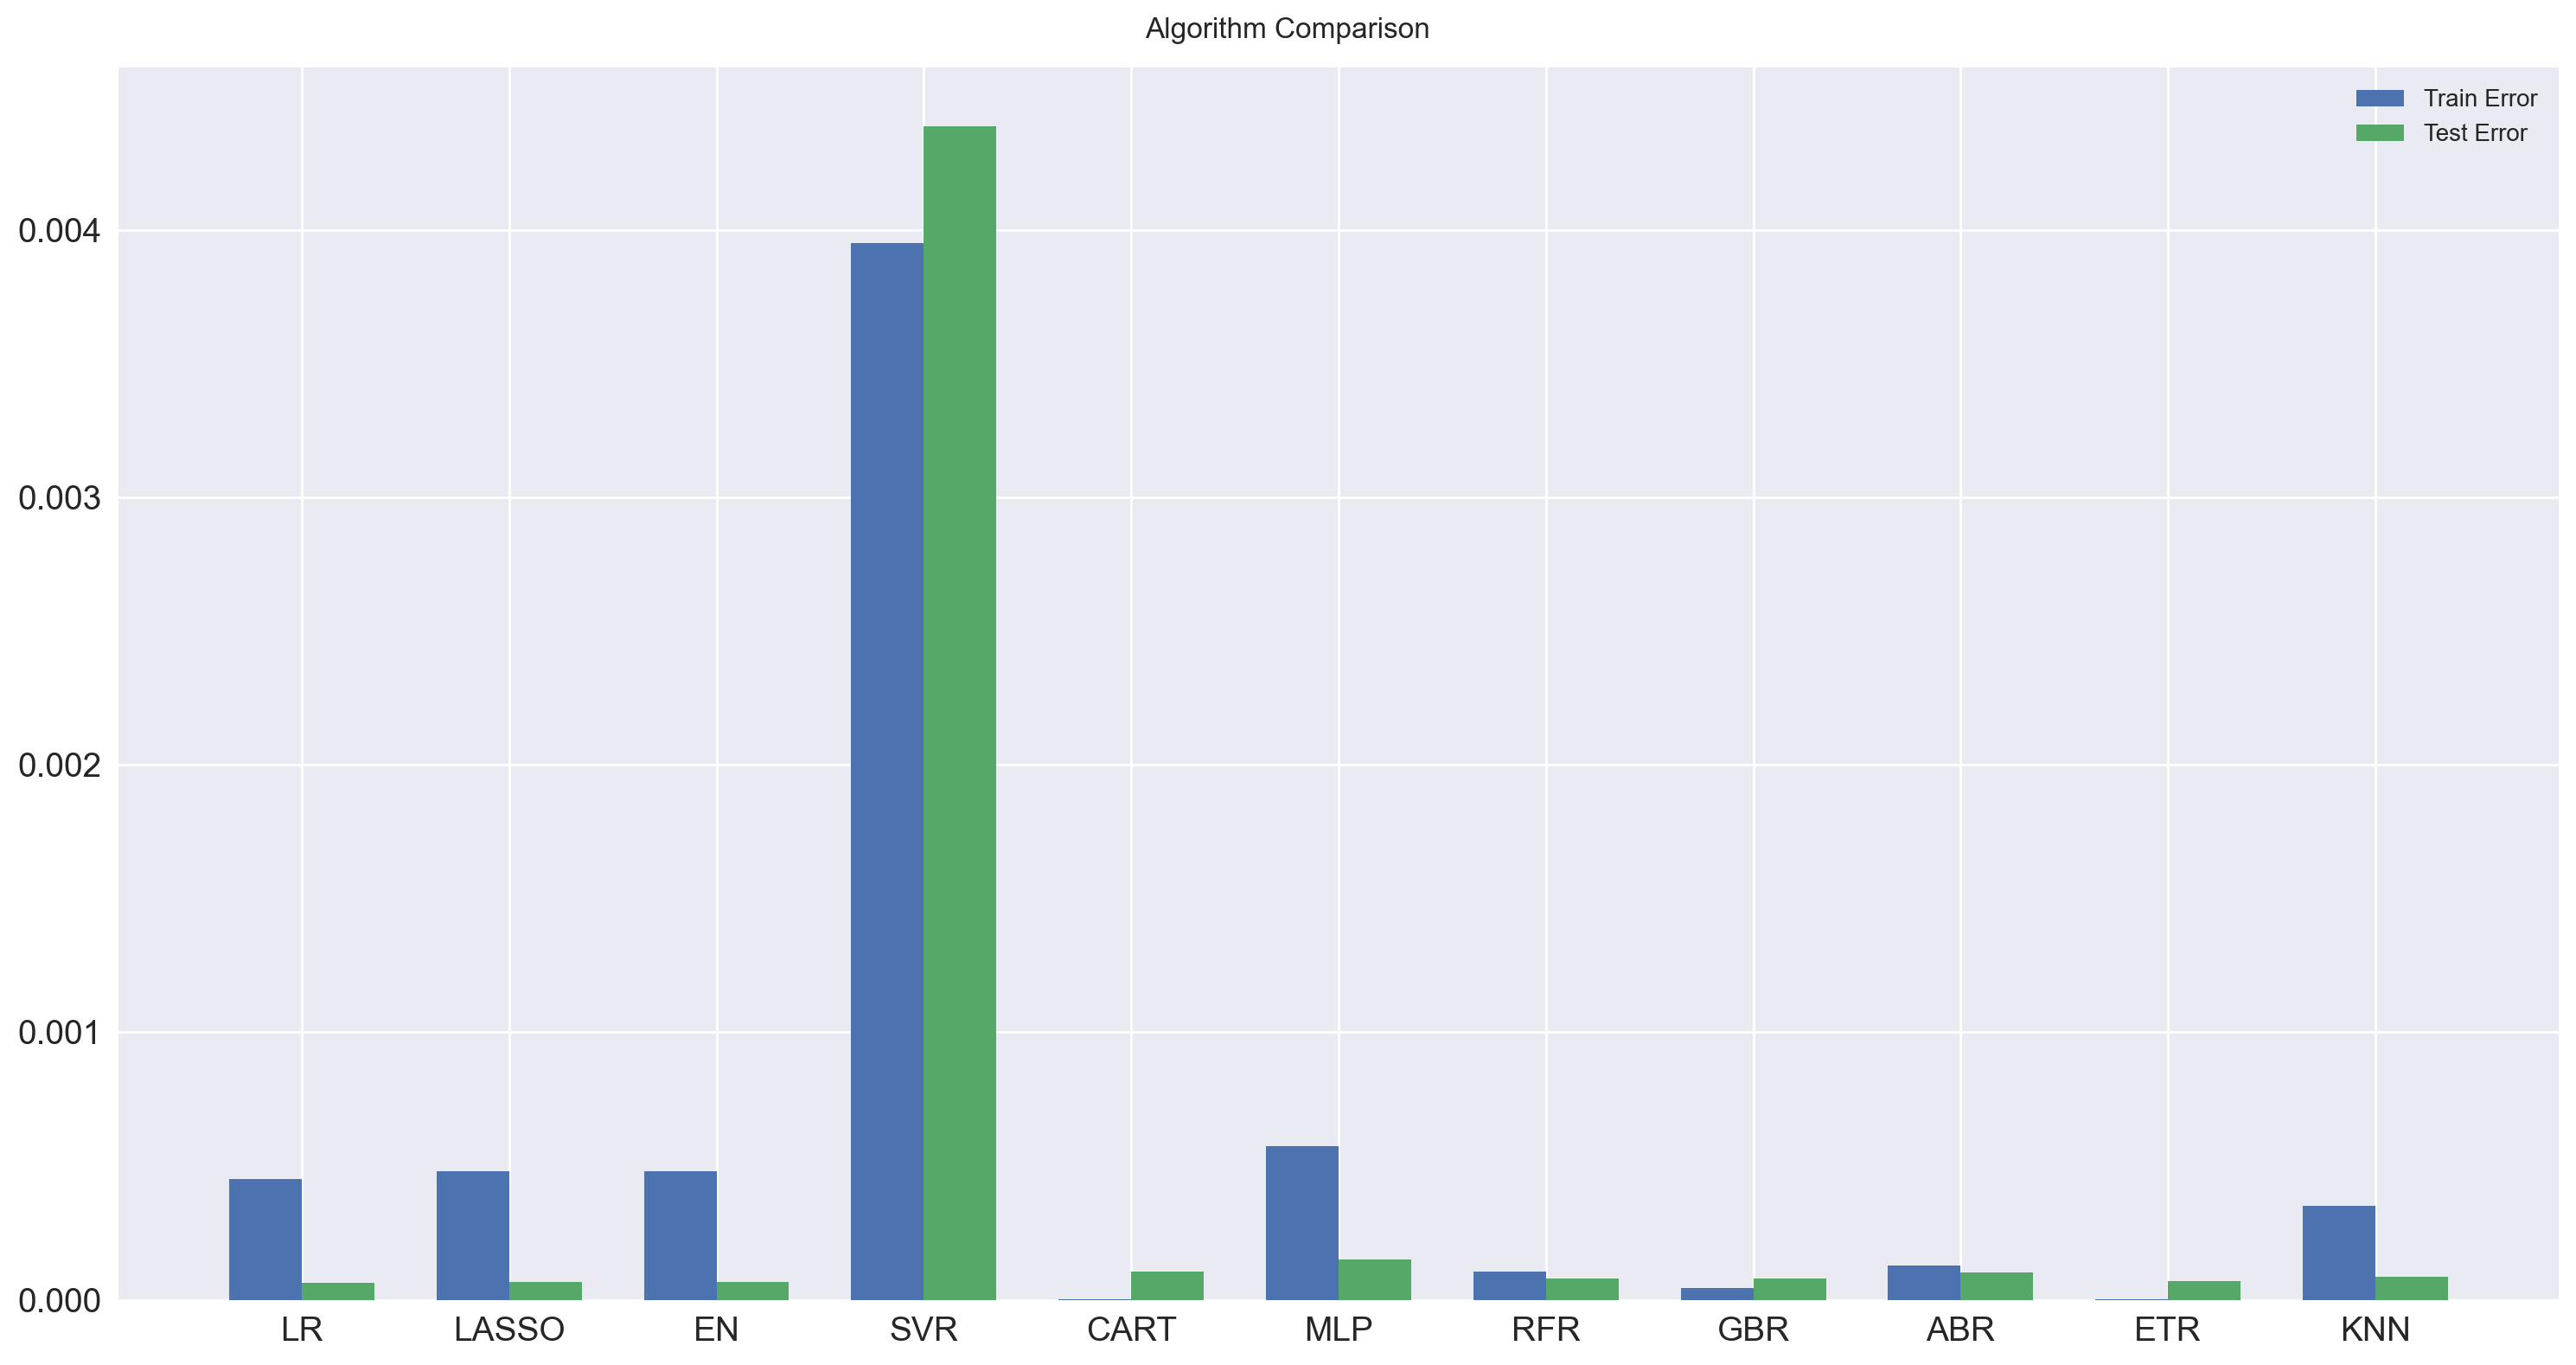

In [52]:
fig = plt.figure()
ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
save_fig('Best Model with Bar Plot')
plt.show()

In [53]:
param_grid = {'fit_intercept': [True, False]}
model = LinearRegression()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000501 using {'fit_intercept': False}
-0.000503 (0.000791) with: {'fit_intercept': True}
-0.000501 (0.000795) with: {'fit_intercept': False}


In [54]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
Y_pred = pd.Series(predicted,index=X_test.index)

Root Mean Squared Error (RMSE): 0.00801409440602875


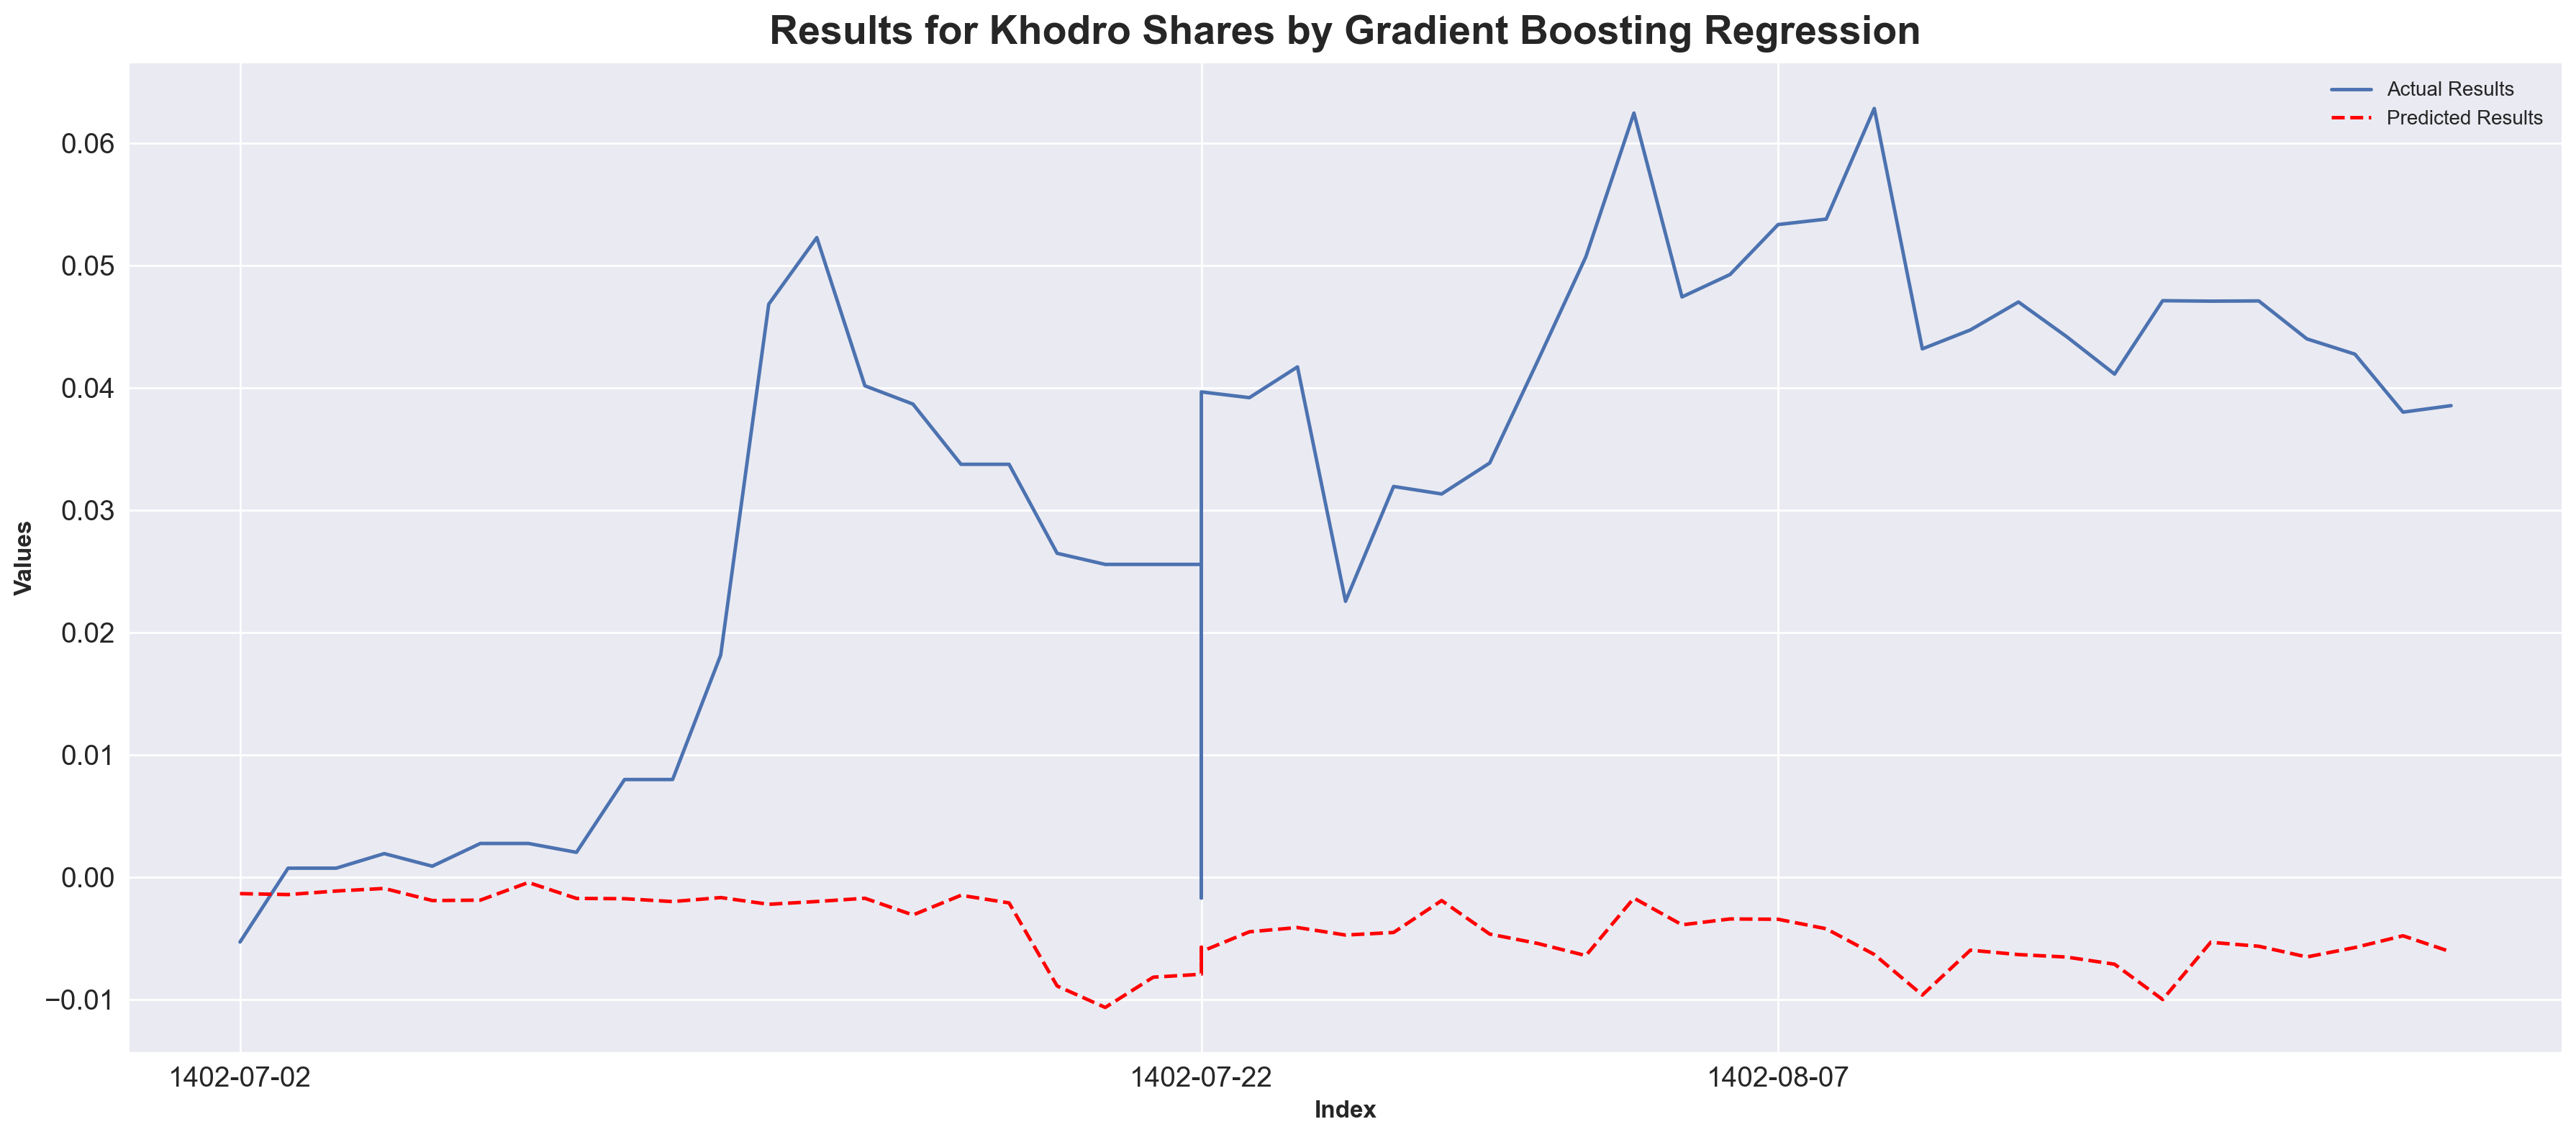

In [55]:
mse = mean_squared_error(Y_test, predicted)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the results
plt.plot(Y_test.cumsum(), label='Actual Results')
plt.plot(Y_pred.cumsum(), 'r--', label='Predicted Results')
plt.legend()
plt.title('Results for Khodro Shares by Gradient Boosting Regression')
plt.xlabel('Index')  # Adjust as needed
plt.ylabel('Values')  # Adjust as needed
plt.xticks(Y_test.index[::20])
plt.show()

Root Mean Squared Error (RMSE): 0.00801409440602875
Saving figure Percentage Prediction with Linear Regression


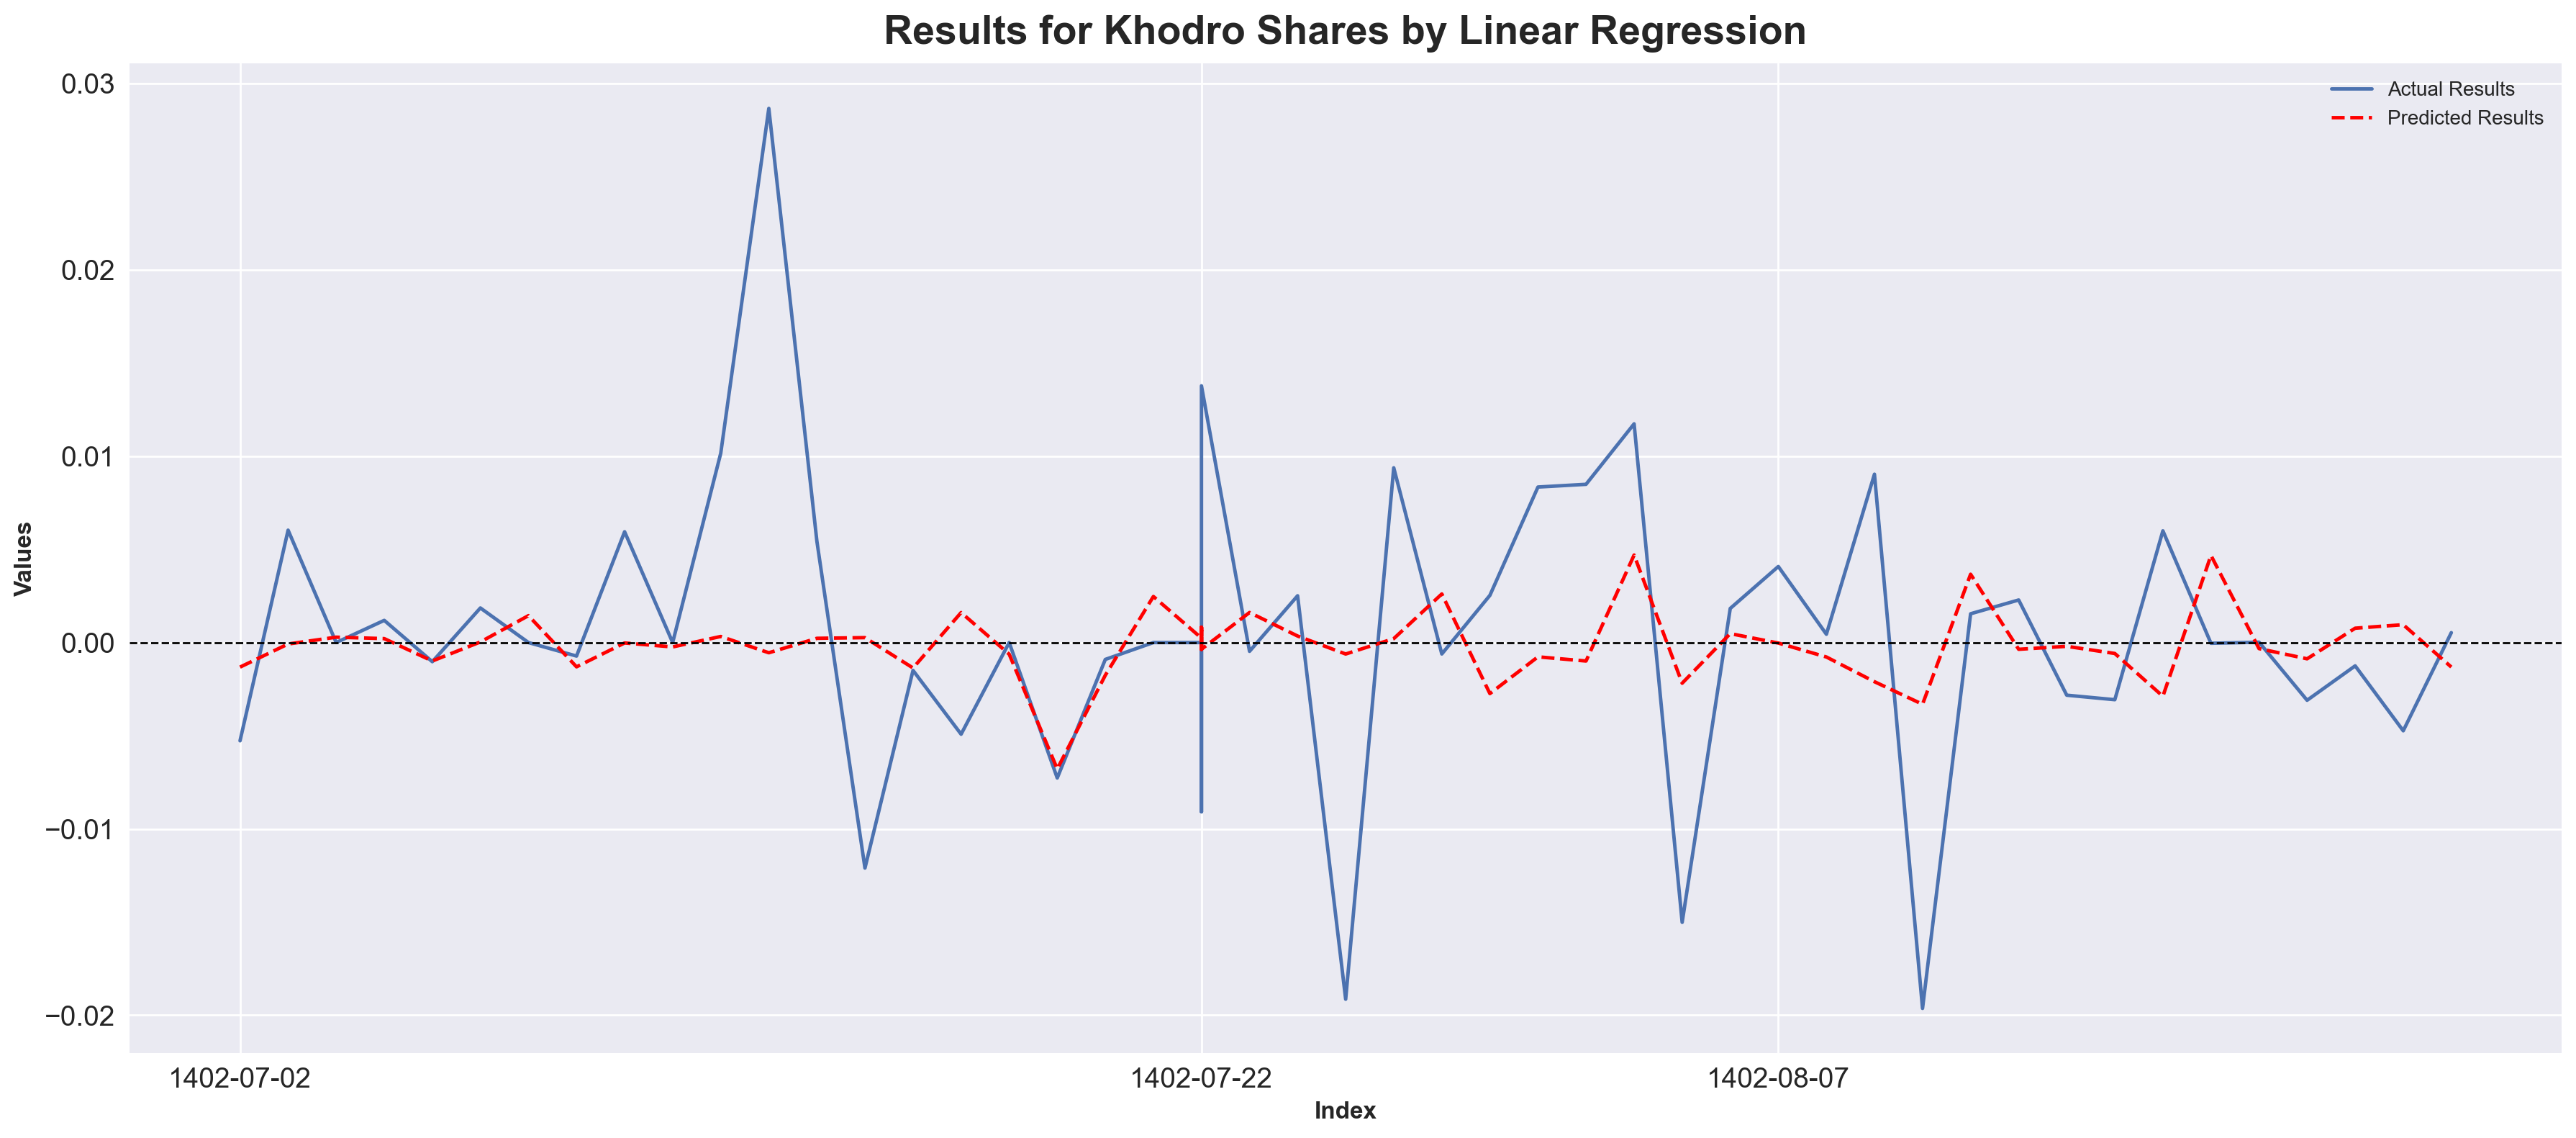

In [56]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the results
plt.plot(Y_test, label='Actual Results')
plt.plot(Y_pred, 'r--', label='Predicted Results')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.legend()
plt.title('Results for Khodro Shares by Linear Regression')
plt.xlabel('Index')  # Adjust as needed
plt.ylabel('Values')  # Adjust as needed
plt.xticks(Y_test.index[::20])
save_fig('Percentage Prediction with Linear Regression')
plt.show()

In [57]:
save_excel(Y_test,'Y_test')

Saving Excel file: D:\Indexs\Excels_File_Periods\Prediction\Y_test.xlsx


In [58]:
save_excel(Y_pred,'Y_pred')

Saving Excel file: D:\Indexs\Excels_File_Periods\Prediction\Y_pred.xlsx


In [59]:
X.shape[1]

4

Saving figure Relationship between X & Y


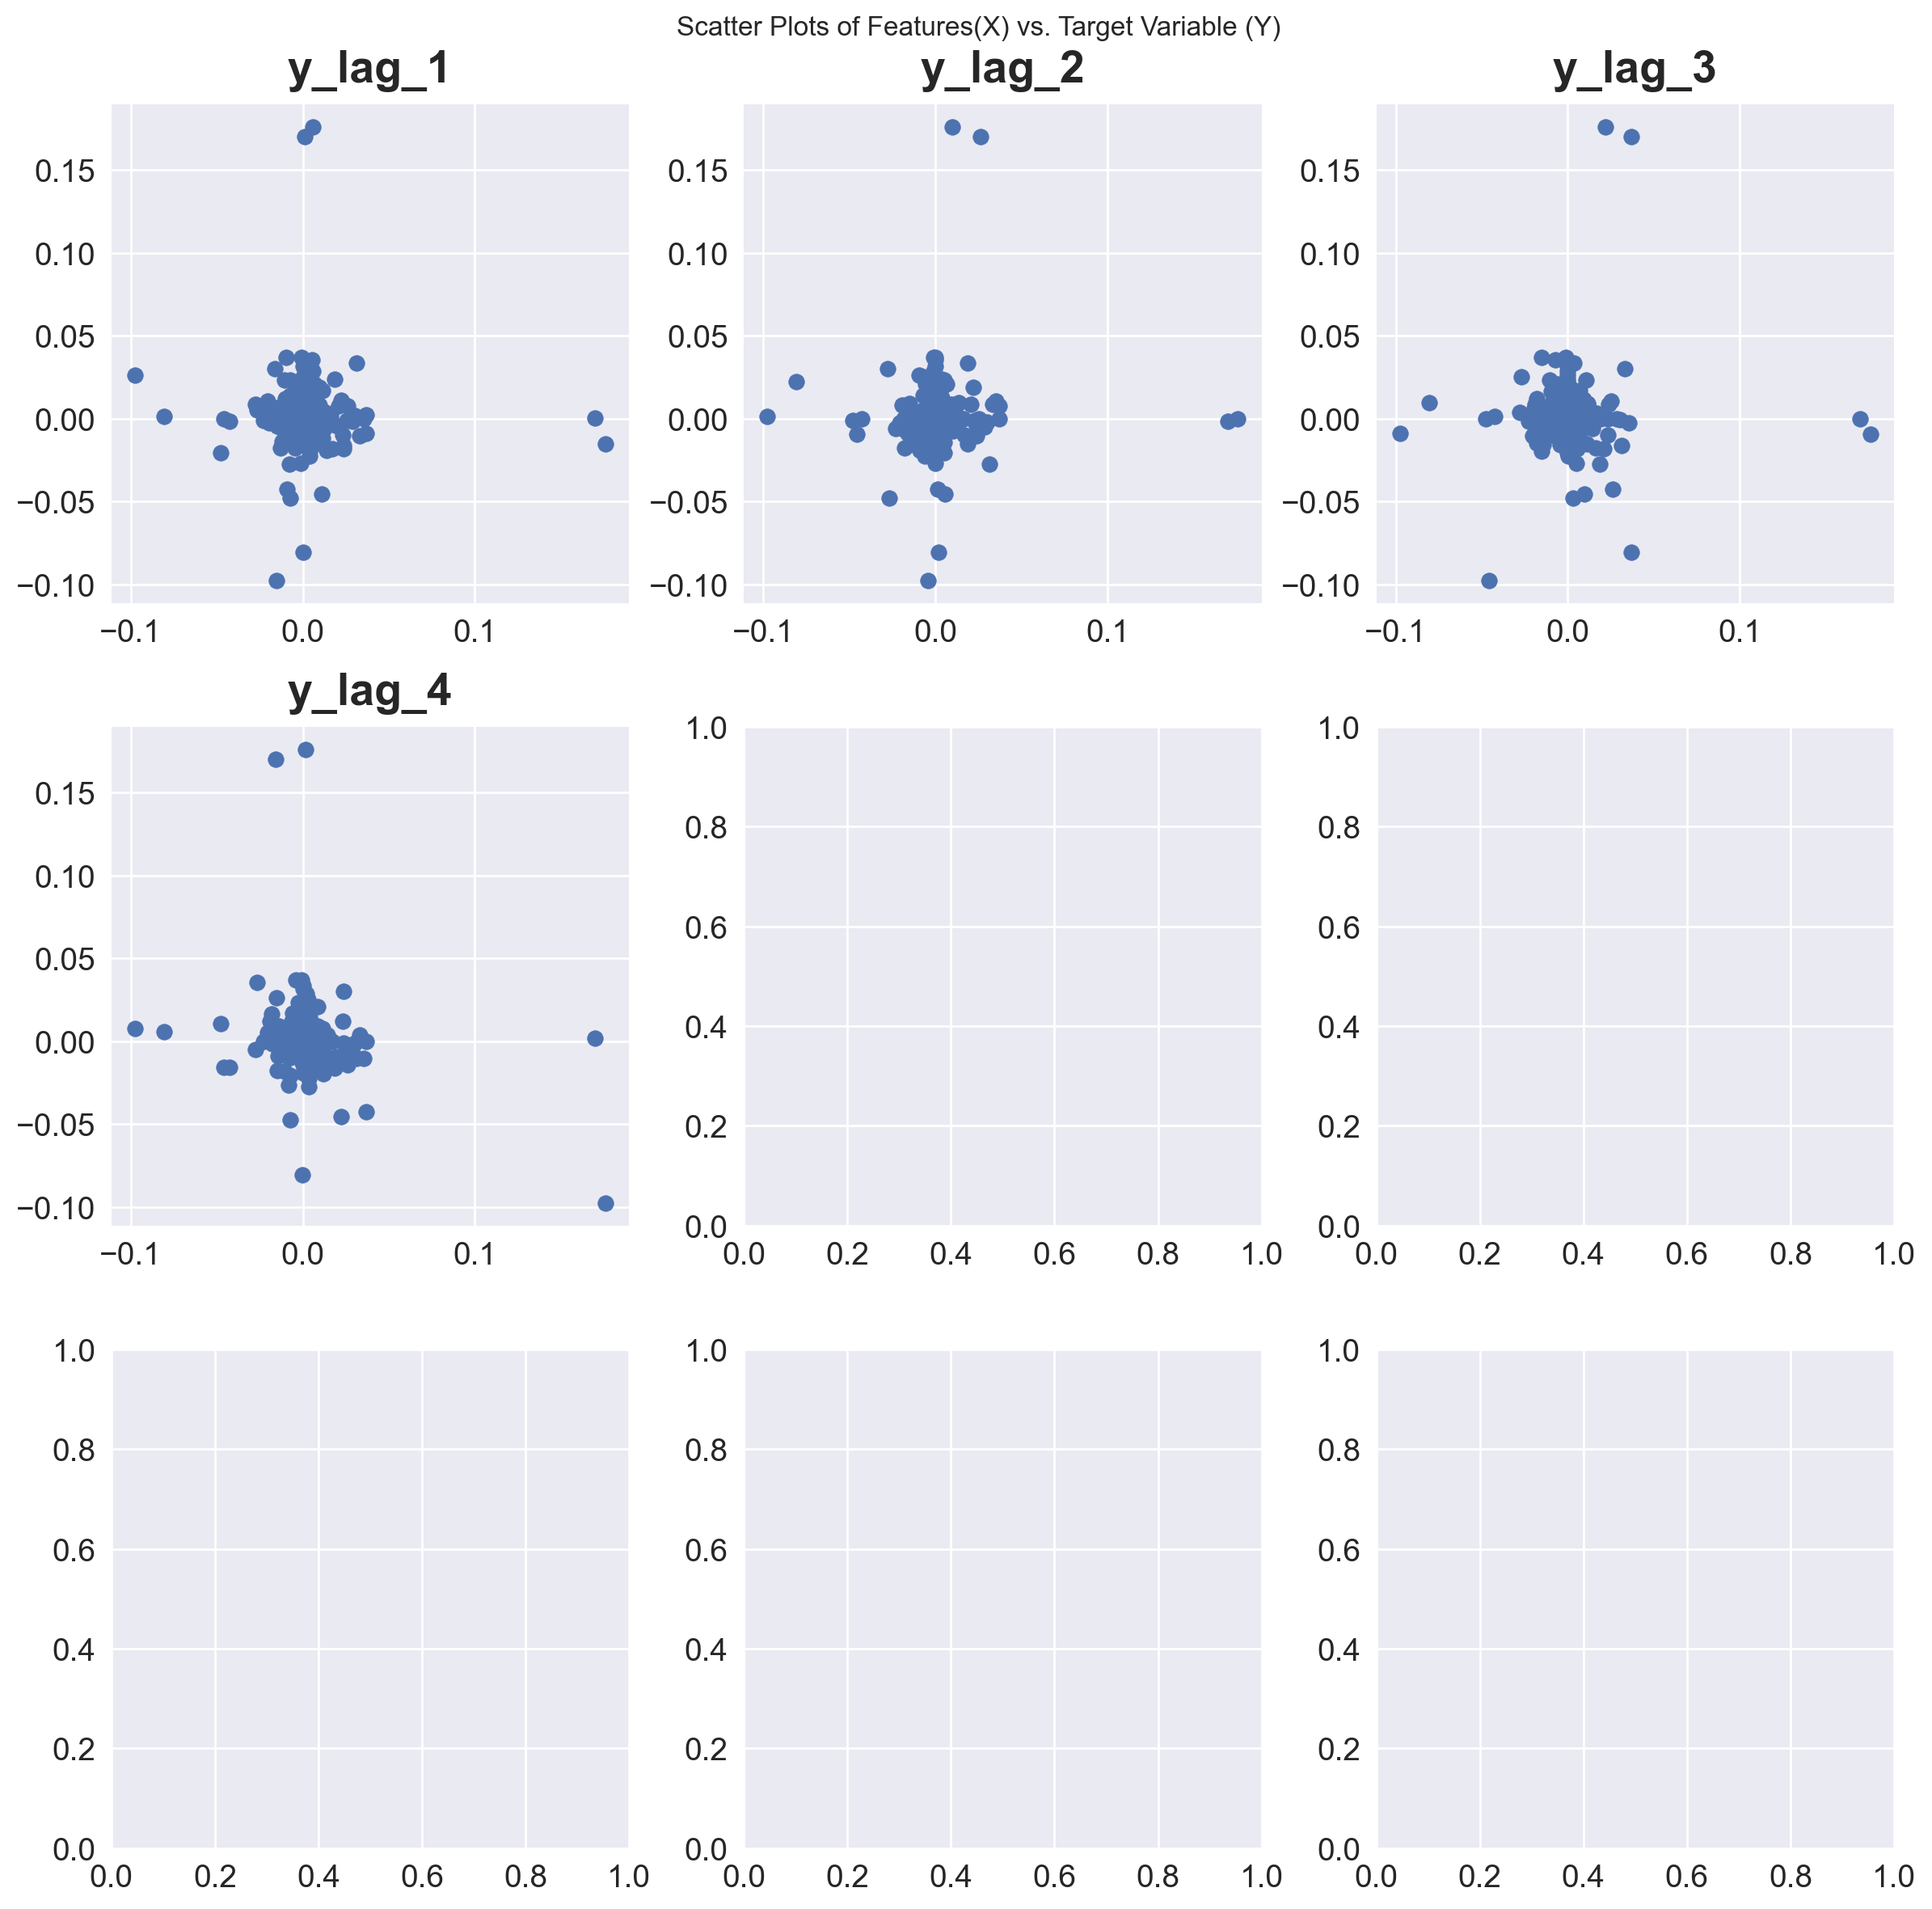

In [60]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Scatter Plots of Features(X) vs. Target Variable (Y)')

for i, feature_name in enumerate(X.columns):
    row, col = divmod(i, 3)
    axs[row, col].scatter(X[feature_name], Y)
    axs[row, col].set_title(feature_name)
save_fig('Relationship between X & Y')
plt.show()

MLP Regressor RMSE: 0.03669053311650702


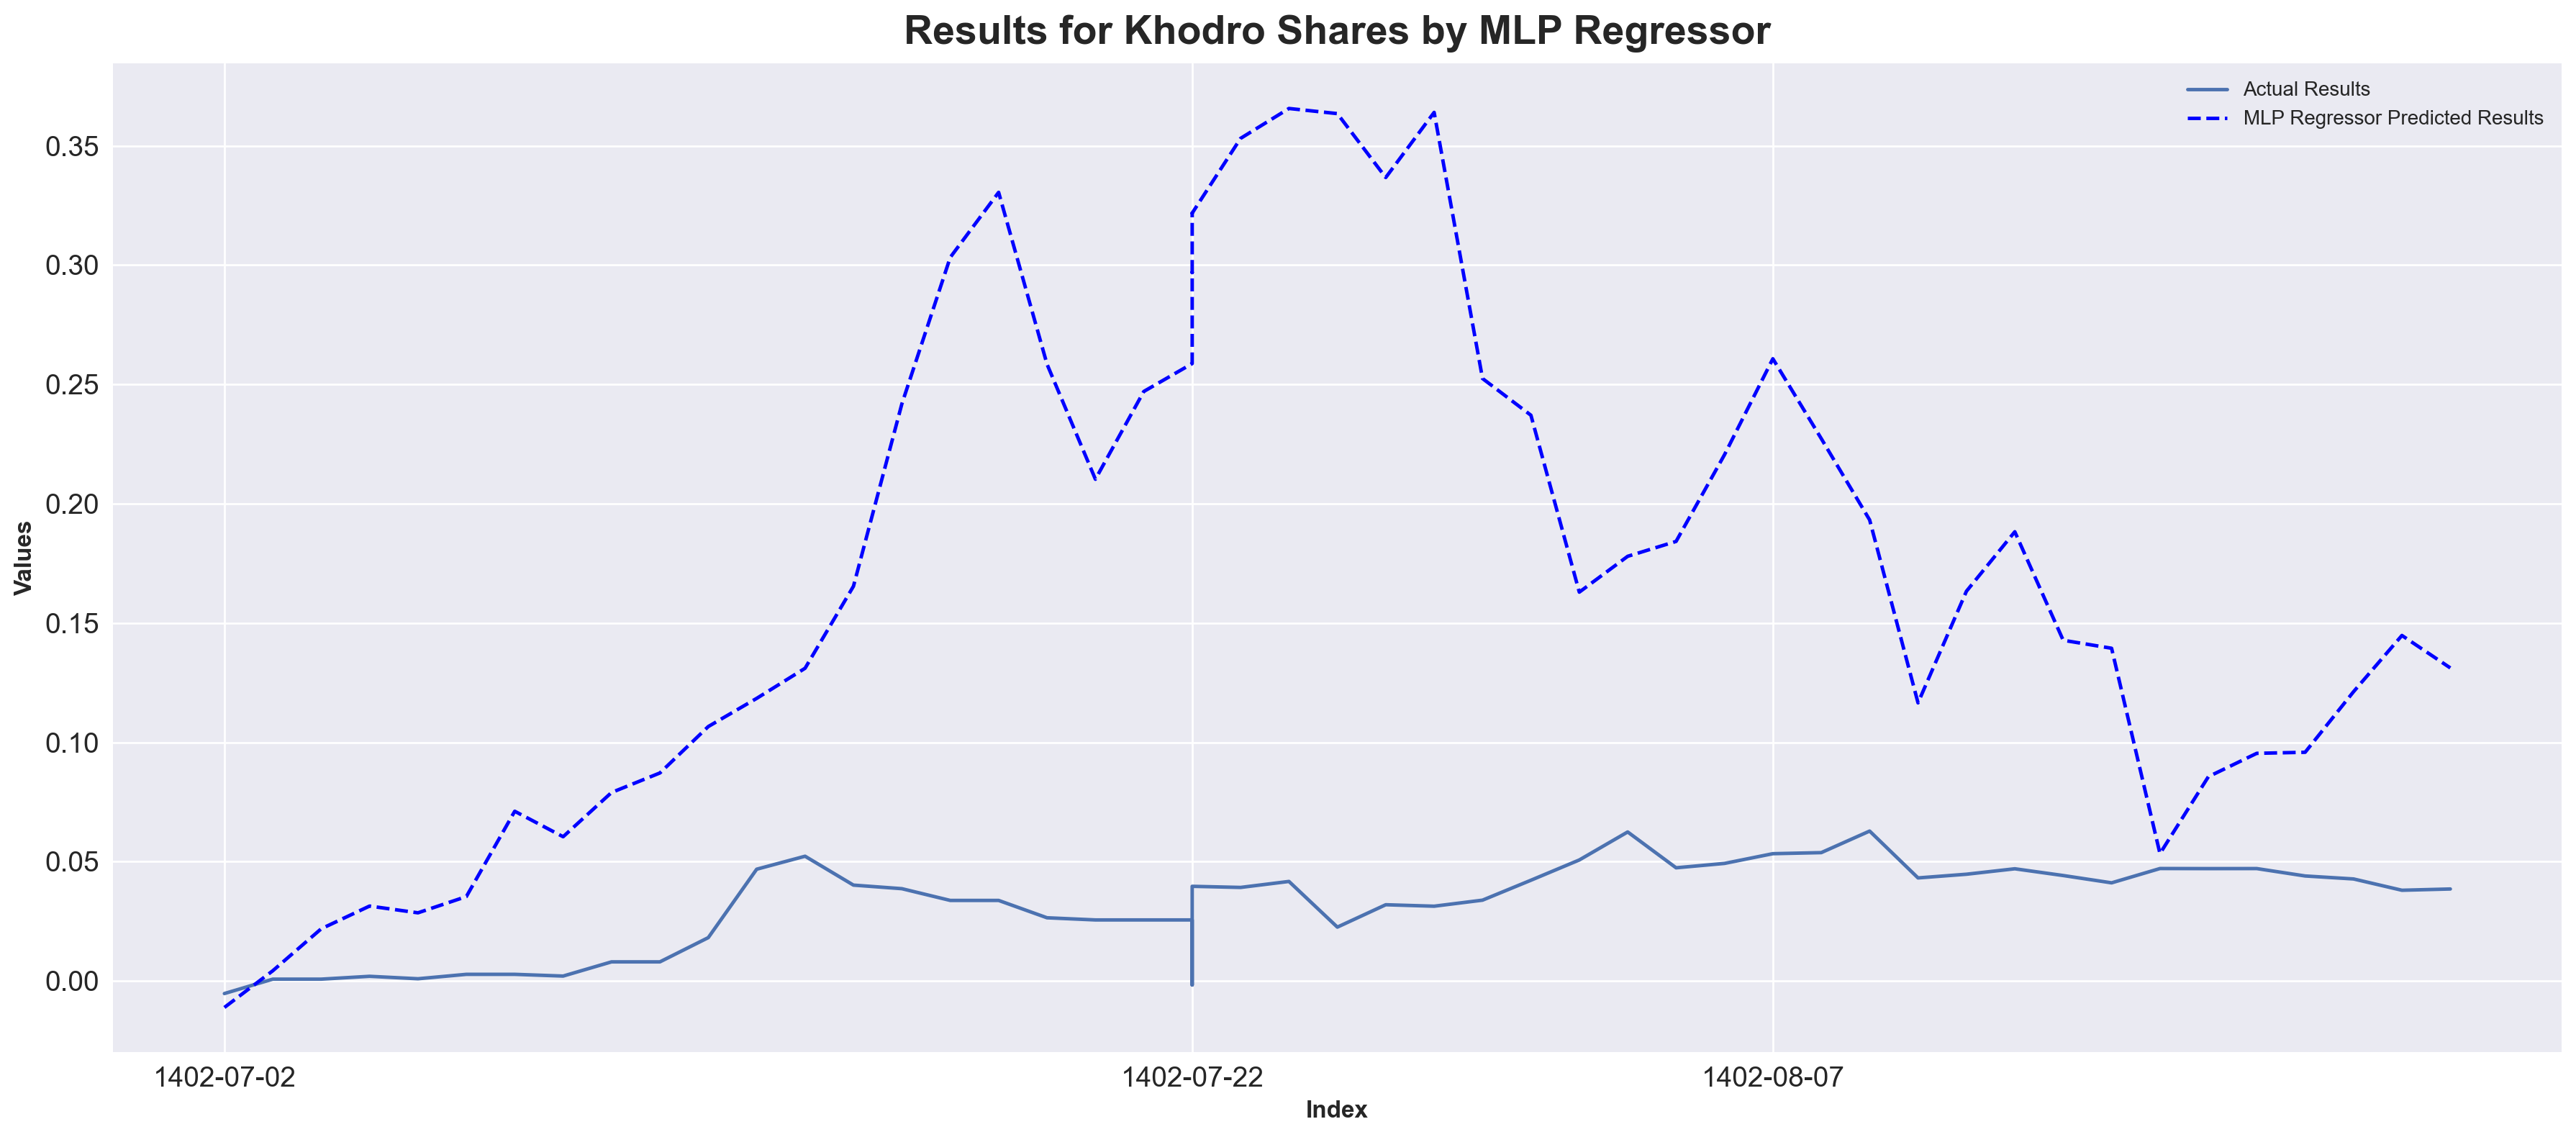

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, Y_train)

# Make predictions on the standardized test set
predicted_mlp = mlp_model.predict(X_test_scaled)
Y_pred_mlp = pd.Series(predicted_mlp, index=X_test.index)

# Calculate RMSE for MLP Regressor
rmse_mlp = np.sqrt(mean_squared_error(Y_test, predicted_mlp))
print(f"MLP Regressor RMSE: {rmse_mlp}")

# Plot the results for MLP Regressor
plt.plot(Y_test.cumsum(), label='Actual Results')
plt.plot(Y_pred_mlp.cumsum(), 'b--', label='MLP Regressor Predicted Results')
plt.legend()
plt.title('Results for Khodro Shares by MLP Regressor')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(Y_test.index[::20])
plt.show()

LASSO - RMSE: 0.008141319252169205, Best Parameters: {'alpha': 0.01}
Elastic Net - RMSE: 0.008002128253919293, Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.2}
Linear Regression - RMSE: 0.007990173574649928, Best Parameters: {'fit_intercept': False}
SVR - RMSE: 0.03600442457507114, Best Parameters: {'C': 0.01, 'gamma': 0.001}
MLP - RMSE: 0.014180069316843057, Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (150,)}
KNN - RMSE: 0.008742615520808206, Best Parameters: {'n_neighbors': 7}
Random Forest - RMSE: 0.00834209098826705, Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Ada Boost - RMSE: 0.008515757959537545, Best Parameters: {'n_estimators': 50}
Saving figure Best Model for Prediction Compare


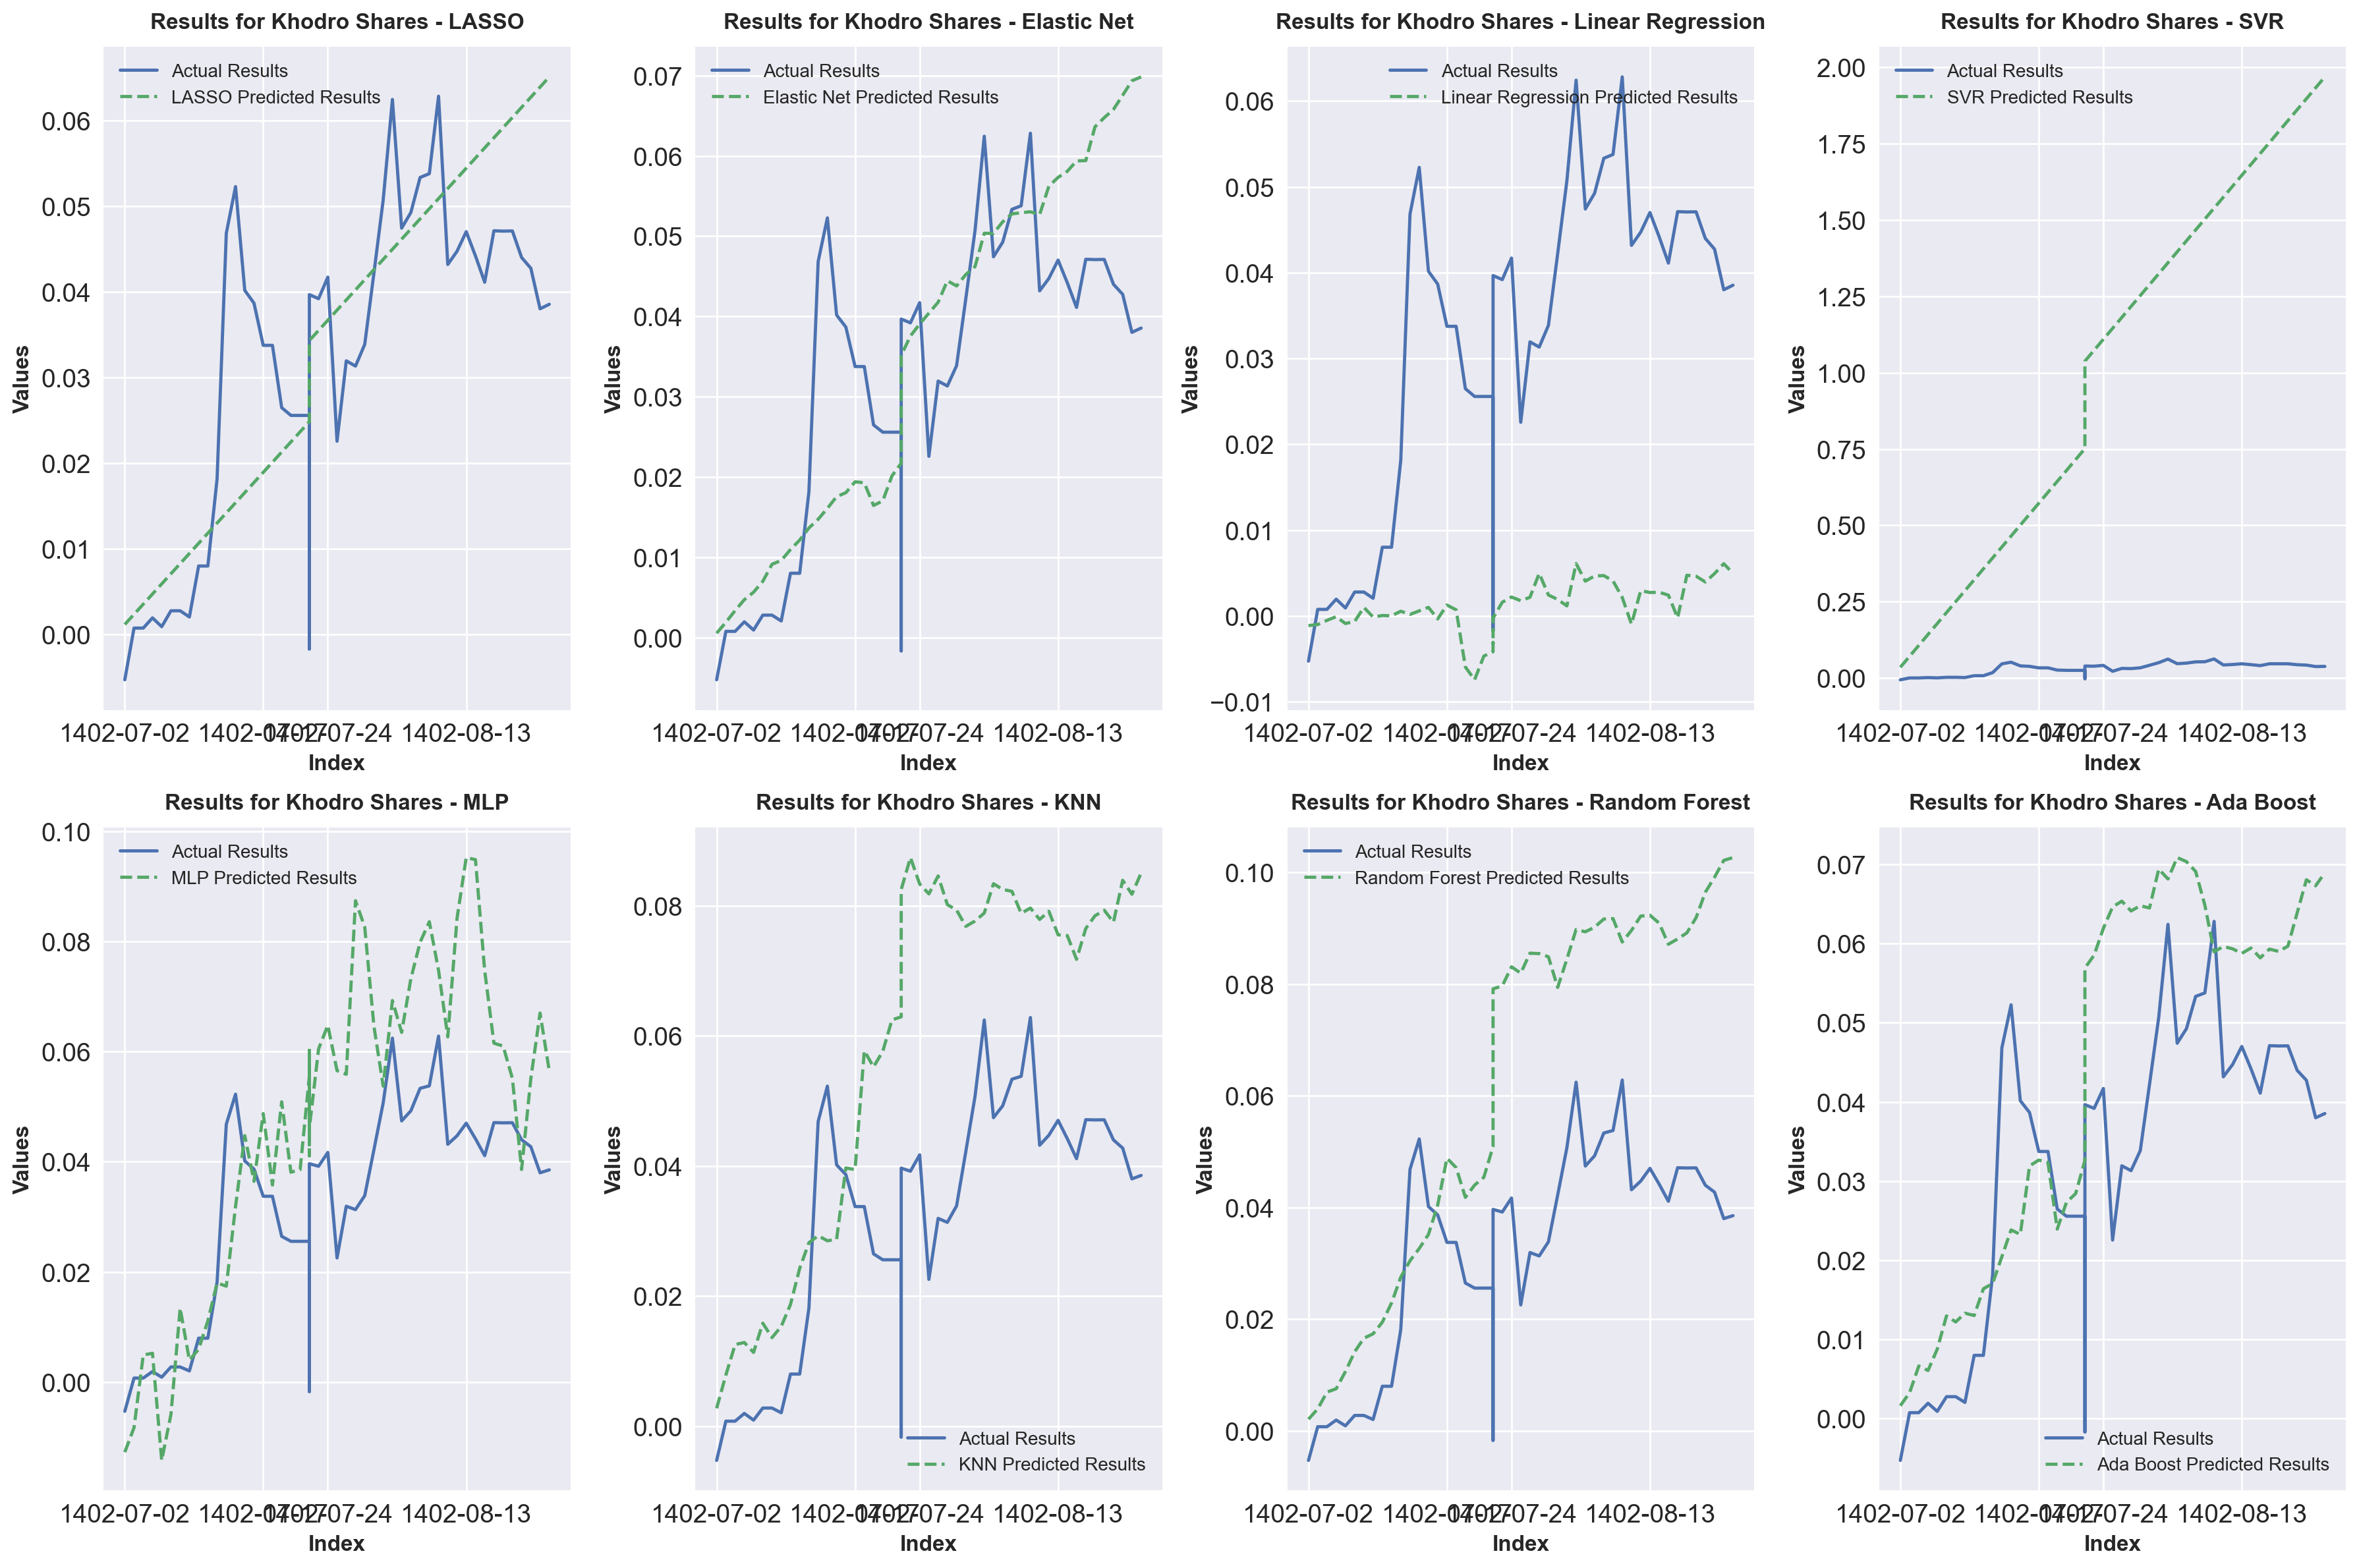

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and their parameter grids for grid search
models = {
    'LASSO': (Lasso(), {'alpha': [0.01, 0.1, 1]}),
    'Elastic Net': (ElasticNet(), {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.2, 0.5, 0.8]}),
    'Linear Regression': (LinearRegression(), {'fit_intercept':[True,False]}),
    'SVR': (SVR(), {'C': [0.01, 0.1, 1], 'gamma': [0.001, 0.01, 0.1]}),
    'MLP': (MLPRegressor(), {'hidden_layer_sizes': [(50,), (100,), (150,)], 'alpha': [0.0001, 0.001, 0.01]}),
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}),
    'Ada Boost':(AdaBoostRegressor(),{'n_estimators':[20,50,100,150]}),
        }
# Train and evaluate each model with grid search
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, Y_train)
    best_model = grid_search.best_estimator_
    predicted = best_model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(Y_test, predicted))
    results[model_name] = {'model': best_model, 'rmse': rmse, 'best_params': grid_search.best_params_}

# Print optimal results
for model_name, result in results.items():
    print(f"{model_name} - RMSE: {result['rmse']}, Best Parameters: {result['best_params']}")

# Plot the results
plt.figure(figsize=(18, 12))

for i, (model_name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 4, i)
    Y_pred = pd.Series(result['model'].predict(X_test_scaled), index=X_test.index)
    plt.plot(Y_test.cumsum(), label='Actual Results')
    plt.plot(Y_pred.cumsum(), label=f'{model_name} Predicted Results', linestyle='--')
    plt.legend()
    plt.title(f'Results for Khodro Shares - {model_name}',fontsize=12)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.xticks(Y_test.index[::15])

plt.tight_layout()
save_fig('Best Model for Prediction Compare')
plt.show()

LASSO - RMSE: 0.008141319252169205, Best Parameters: {'alpha': 0.01}
Elastic Net - RMSE: 0.008002128253919293, Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.2}
Linear Regression - RMSE: 0.007990173574649928, Best Parameters: {'fit_intercept': False}
SVR - RMSE: 0.03600442457507114, Best Parameters: {'C': 0.01, 'gamma': 0.001}
MLP - RMSE: 0.018232539963746457, Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (150,)}
KNN - RMSE: 0.008742615520808206, Best Parameters: {'n_neighbors': 7}
Random Forest - RMSE: 0.00899801760093261, Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Ada Boost - RMSE: 0.008781248928188694, Best Parameters: {'n_estimators': 20}
Saving figure Best Model for Prediction Returns Compare


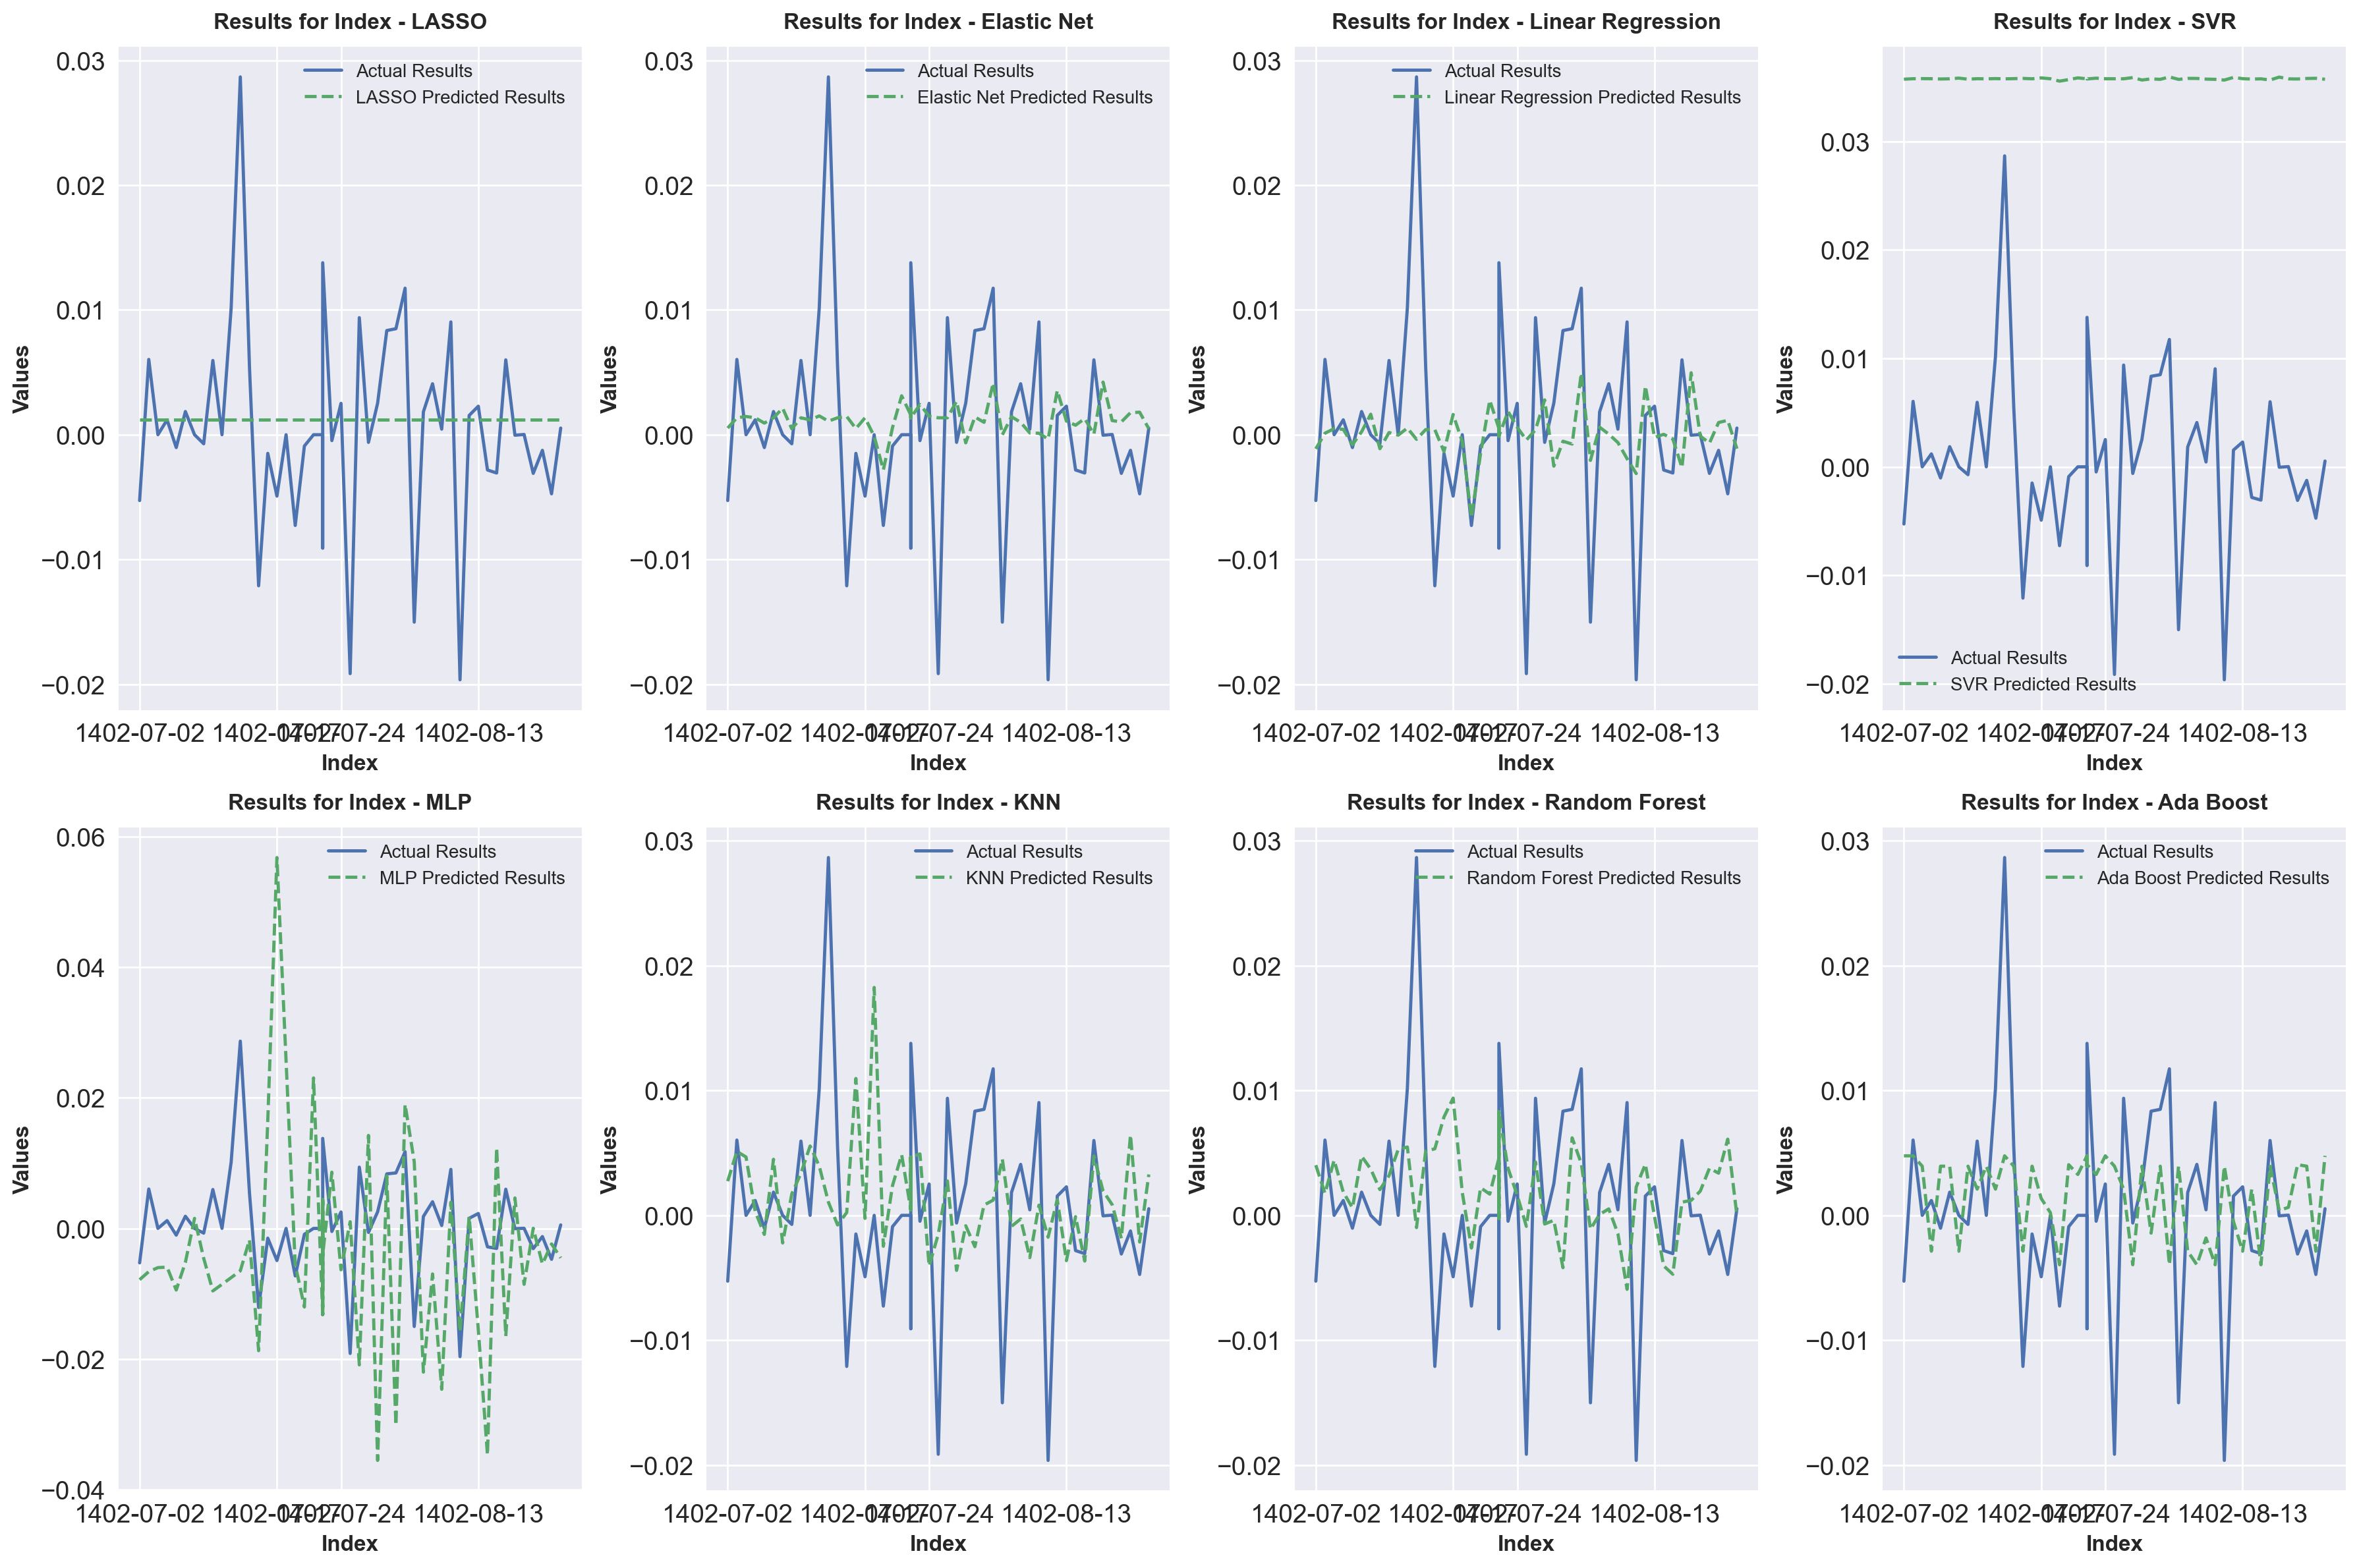

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and their parameter grids for grid search
models = {
    'LASSO': (Lasso(), {'alpha': [0.01, 0.1, 1]}),
    'Elastic Net': (ElasticNet(), {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.2, 0.5, 0.8]}),
    'Linear Regression': (LinearRegression(), {'fit_intercept':[True,False]}),
    'SVR': (SVR(), {'C': [0.01, 0.1, 1], 'gamma': [0.001, 0.01, 0.1]}),
    'MLP': (MLPRegressor(), {'hidden_layer_sizes': [(50,), (100,), (150,)], 'alpha': [0.0001, 0.001, 0.01]}),
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}),
    'Ada Boost':(AdaBoostRegressor(),{'n_estimators':[20,50,100,150]}),
}

# Train and evaluate each model with grid search
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, Y_train)
    best_model = grid_search.best_estimator_
    predicted = best_model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(Y_test, predicted))
    results[model_name] = {'model': best_model, 'rmse': rmse, 'best_params': grid_search.best_params_}

# Print optimal results
for model_name, result in results.items():
    print(f"{model_name} - RMSE: {result['rmse']}, Best Parameters: {result['best_params']}")

# Plot the results
plt.figure(figsize=(18, 12))

for i, (model_name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 4, i)
    Y_pred = pd.Series(result['model'].predict(X_test_scaled), index=X_test.index)
    plt.plot(Y_test, label='Actual Results')
    plt.plot(Y_pred, label=f'{model_name} Predicted Results', linestyle='--')
    plt.legend()
    plt.title(f'Results for Index - {model_name}',fontsize=12)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.xticks(Y_test.index[::15])

plt.tight_layout()
save_fig('Best Model for Prediction Returns Compare')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'Verdana', 'DejaVu Sans']

# Your plotting code here
plt.plot([1, 2, 3, 4], label='داده‌ها')

plt.title('نمودار Persian')
plt.xlabel('محور افقی')
plt.ylabel('محور عمودی')

plt.legend()
plt.show()
